# Classifying Diabetes Mellitus Status

## Section 1: Summary of Available Features 

In [1]:
# Load primary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.plotting.register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline

### Loading the data

In [2]:
#designate the path to the data
diabetes_data_path = "/Users/Peter/Documents/DiabetesClassificationDataset2022.xlsx"

#Load the data using pandas read_excel function.
diabetes_data = pd.read_excel(diabetes_data_path)

In [3]:
# Confirming the dataset: Showing the dimension of the dataset
print(diabetes_data.shape)

(79159, 88)


In [4]:
#Confirming the dataset: Showing the first 5 rows of the dataset
diabetes_data.head()

encounter_id  hospital_id gender  ethnicity   age  elective_surgery  \
0        214826          118      M  Caucasian  68.0                 0   
1        276985          118      F  Caucasian  25.0                 0   
2        262220          118      F  Caucasian  81.0                 1   
3        201746           33      M  Caucasian  19.0                 0   
4        246060           81      F  Caucasian  77.0                 0   

   height  weight        bmi  readmission_status      icu_type  h1_temp_max  \
0   180.3    73.9  22.732803                   0         CTICU         39.5   
1   172.7    95.3  31.952749                   0  Med-Surg ICU         36.7   
2   165.1    61.7  22.635548                   0         CTICU         35.6   
3   188.0     NaN        NaN                   0  Med-Surg ICU          NaN   
4   160.0    70.2  27.421875                   0  Med-Surg ICU         36.3   

   h1_temp_min  d1_albumin_max  d1_albumin_min  d1_bilirubin_max  \
0         37.5             2.3             2.3               0.4   
1         36.7             NaN             NaN               NaN   
2         34.8             NaN             NaN               NaN   
3          NaN             NaN             NaN               NaN   
4         36.3             1.6             1.6               0.5   

   d1_bilirubin_min  d1_bun_max  d1_bun_min  d1_glucose_min  d1_hco3_max  \
0               0.4        31.0        30.0           109.0         19.0   
1               NaN         NaN         NaN             NaN          NaN   
2               NaN         NaN         NaN            88.0          NaN   
3               NaN         NaN         NaN             NaN          NaN   
4               0.5        11.0         9.0           128.0         27.0   

   d1_hco3_min  d1_inr_max  d1_inr_min  d1_lactate_max  ...  \
0         15.0         NaN         NaN             1.3  ...   
1          NaN         NaN         NaN             NaN  ...   
2          NaN         1.6         1.1             NaN  ...   
3          NaN         NaN         NaN             NaN  ...   
4         26.0         1.3         1.3             3.5  ...   

   h1_arterial_ph_min  h1_arterial_po2_max  h1_arterial_po2_min  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2                7.34                337.0                265.0   
3                 NaN                  NaN                  NaN   
4                7.45                 51.0                 51.0   

   h1_pao2fio2ratio_max  h1_pao2fio2ratio_min  wbc_apache  intubated_apache  \
0                   NaN                   NaN        14.1                 0   
1                   NaN                   NaN         NaN                 0   
2                 337.0                 337.0         8.0                 1   
3                   NaN                   NaN         NaN                 0   
4                  51.0                  51.0        12.7                 0   

   d1_heartrate_max  heart_rate_apache  gcs_motor_apache  gcs_eyes_apache  \
0             119.0              118.0               6.0              3.0   
1              96.0              102.0               6.0              3.0   
2             116.0              114.0               6.0              4.0   
3              89.0               60.0               NaN              NaN   
4             118.0              120.0               3.0              1.0   

   creatinine_apache  bilirubin_apache  h1_spo2_max  paco2_apache  map_apache  \
0               2.51               0.4        100.0           NaN        40.0   
1                NaN               NaN         98.0           NaN        68.0   
2                NaN               NaN        100.0          30.0        60.0   
3                NaN               NaN        100.0           NaN       103.0   
4               0.56               NaN         95.0          37.0        46.0   

   aids  c

In [5]:
#Confirming the dataset: Showing the last 5 rows of the dataset
diabetes_data.tail()

encounter_id  hospital_id gender         ethnicity   age  \
79154        166024          146      F         Caucasian  86.0   
79155        185015          154      F         Caucasian  55.0   
79156        173688           47      M  African American  61.0   
79157        169835          120      M         Caucasian  80.0   
79158        209541           55      M         Caucasian  88.0   

       elective_surgery  height  weight        bmi  readmission_status  \
79154                 0   167.6    86.2  30.687339                   0   
79155                 0   165.1    91.7  33.641487                   0   
79156                 0   173.0    88.1  29.436333                   0   
79157                 0   175.0    84.8  27.689796                   0   
79158                 0   170.1    90.9  31.416316                   0   

           icu_type  h1_temp_max  h1_temp_min  d1_albumin_max  d1_albumin_min  \
79154  Med-Surg ICU         36.7         36.7             NaN             NaN   
79155          MICU         36.6         36.6             NaN             NaN   
79156         CTICU         36.8         36.8             2.6             2.6   
79157     CCU-CTICU          NaN          NaN             2.0             2.0   
79158  Med-Surg ICU         36.9         35.7             3.0             3.0   

       d1_bilirubin_max  d1_bilirubin_min  d1_bun_max  d1_bun_min  \
79154               NaN               NaN        17.0        17.0   
79155               NaN               NaN         9.0         9.0   
79156               0.4               0.4        22.0        22.0   
79157               0.2               0.2        50.0        50.0   
79158               0.7               0.7        28.0        22.0   

       d1_glucose_min  d1_hco3_max  d1_hco3_min  d1_inr_max  d1_inr_min  \
79154           117.0         25.0         25.0         NaN         NaN   
79155           136.0         24.0         24.0         1.5         1.5   
79156           103.0         25.0         25.0         NaN         NaN   
79157           127.0         20.0         20.0         1.4         1.4   
79158           118.0         25.0         25.0         1.2         1.2   

       d1_lactate_max  ...  h1_arterial_ph_min  h1_arterial_po2_max  \
79154             NaN  ...                 NaN                  NaN   
79155             NaN  ...               7.563                  NaN   
79156             NaN  ...                 NaN                  NaN   
79157             1.4  ...                 NaN                  NaN   
79158             1.4  ...               7.340                206.0   

       h1_arterial_po2_min  h1_pao2fio2ratio_max  h1_pao2fio2ratio_min  \
79154                  NaN                   NaN                   NaN   
79155                  NaN                   NaN                   NaN   
79156                  NaN                   NaN                   NaN   
79157                  NaN                   NaN                   NaN   
79158                206.0                 206.0                 206.0   

       wbc_apache  intubated_apache  d1_heartrate_max  heart_rate_apache  \
79154         9.6                 0             116.0              116.0   
79155        18.6                 0             114.0              117.0   
79156         NaN                 0             104.0              104.0   
79157        12.0                 0             125.0              125.0   
79158        10.0                 1             104.0              105.0   

       gcs_motor_apache  gcs_eyes_apache  creatinine_apache  bilirubin_apache  \
79154               6.0              3.0               0.88               NaN   
79155               6.0              4.0               0.50               NaN   
79156               6.0              4.0                NaN               NaN   
79157               6.0              4.0               1.36               0.2   
79158               3.0              1.0               1.47             

In [6]:
# Ascertaining data types 
diabetes_data.dtypes

encounter_id                     int64
hospital_id                      int64
gender                          object
ethnicity                       object
age                            float64
elective_surgery                 int64
height                         float64
weight                         float64
bmi                            float64
readmission_status               int64
icu_type                        object
h1_temp_max                    float64
h1_temp_min                    float64
d1_albumin_max                 float64
d1_albumin_min                 float64
d1_bilirubin_max               float64
d1_bilirubin_min               float64
d1_bun_max                     float64
d1_bun_min                     float64
d1_glucose_min                 float64
d1_hco3_max                    float64
d1_hco3_min                    float64
d1_inr_max                     float64
d1_inr_min                     float64
d1_lactate_max                 float64
d1_lactate_min           

### Summary Statistics of Data Types 

In [7]:
#Grouping Continuous Data Type
continuous_columns = diabetes_data.select_dtypes(include=['float64']).columns
continuous_columns

Index(['age', 'height', 'weight', 'bmi', 'h1_temp_max', 'h1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_glucose_min',
       'd1_hco3_max', 'd1_hco3_min', 'd1_inr_max', 'd1_inr_min',
       'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_max',
       'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min',
       'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min',
       'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max',
       'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max',
       'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min',
       'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min',
       'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min',
       'h1_lactate_max', 'h1_lactate_min', 'h1_sodium_max', 'h1_sodium_min',
       'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max',
       'd1_pao2fio2rat

In [8]:
# Grouping Categorical Columns (includes both string and numeric binary variables)
categorical_columns = diabetes_data.select_dtypes(exclude=['float64']).columns
categorical_columns

Index(['encounter_id', 'hospital_id', 'gender', 'ethnicity',
       'elective_surgery', 'readmission_status', 'icu_type',
       'intubated_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache',
       'diabetes_mellitus'],
      dtype='object')

In [9]:
print("Number of Continuous Columns:", len(continuous_columns))
print("Number of Categorical Columns:", len(categorical_columns))
print("Number of Non-numeric Categorical Columns:", len(diabetes_data.select_dtypes(include='object').columns))

Number of Continuous Columns: 71
Number of Categorical Columns: 17
Number of Non-numeric Categorical Columns: 3


In [10]:
#Summary Statistics of Continuous variables
StatsNum= diabetes_data[continuous_columns].describe()

# Include Number of missing observations in the Summary Statistics 
for column in continuous_columns:
    StatsNum.loc['missing',column] = diabetes_data[column].isnull().sum()
print(StatsNum)

#Export output to include in report 
StatsNum.to_excel('statsnum.xlsx')

                  age        height        weight           bmi   h1_temp_max  \
count    76317.000000  77978.000000  77086.000000  76468.000000  61223.000000   
mean        62.452389    169.565316     85.114552     29.600786     36.721315   
std         16.446715     10.835017     25.465505      8.487987      0.771686   
min          0.000000    137.200000     38.600000     14.844926     33.400000   
25%         53.000000    162.500000     67.700000     23.875433     36.400000   
50%         65.000000    170.000000     81.600000     28.029903     36.700000   
75%         75.000000    177.800000     98.400000     33.420162     37.100000   
max         89.000000    195.590000    186.000000     67.814990     39.500000   
missing   2842.000000   1181.000000   2073.000000   2691.000000  17936.000000   

          h1_temp_min  d1_albumin_max  d1_albumin_min  d1_bilirubin_max  \
count    61223.000000    36066.000000    36066.000000      32682.000000   
mean        36.612966        2.947069  

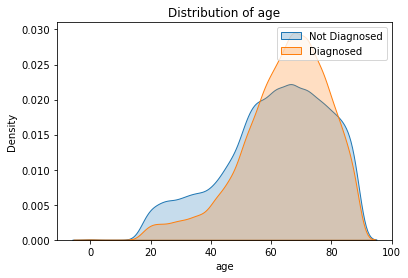

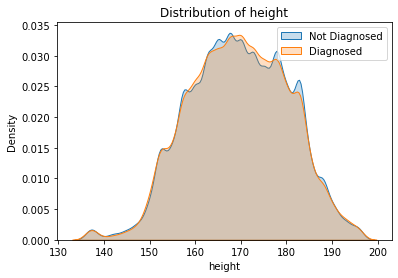

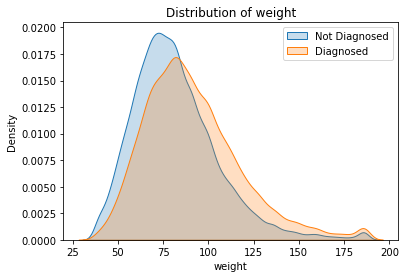

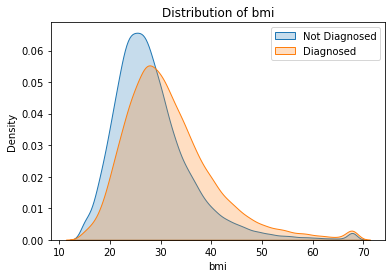

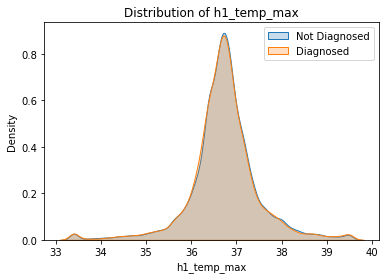

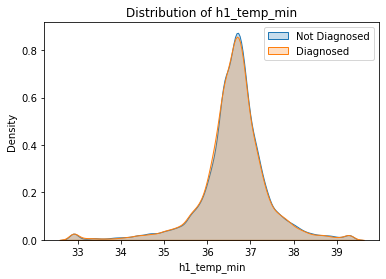

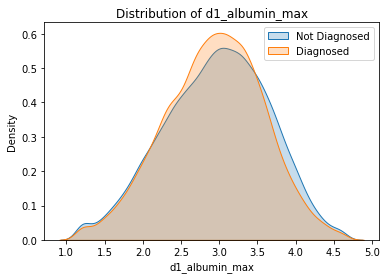

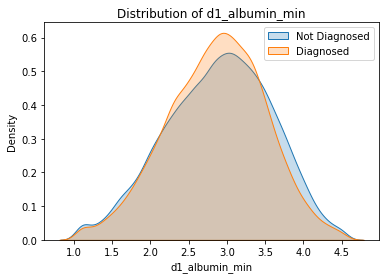

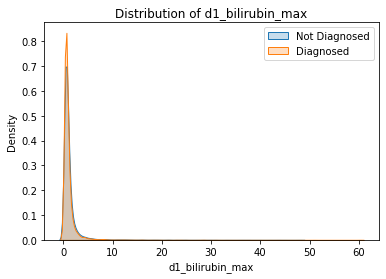

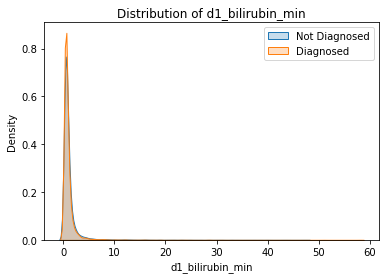

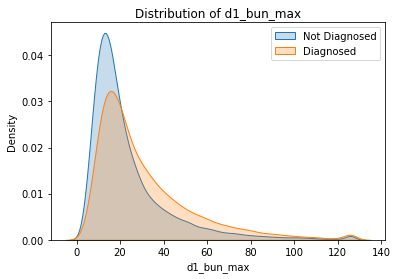

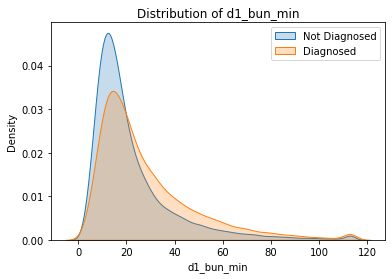

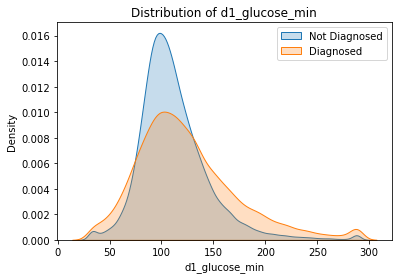

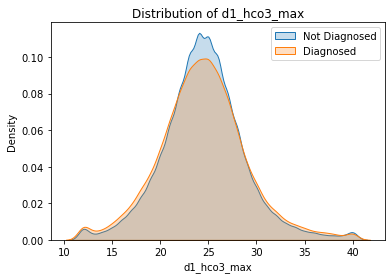

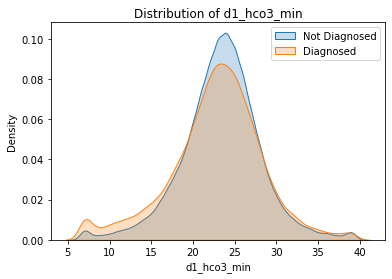

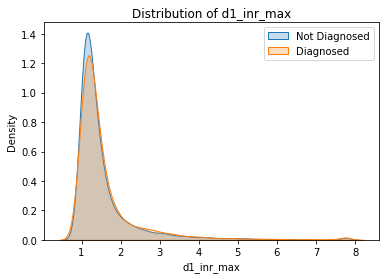

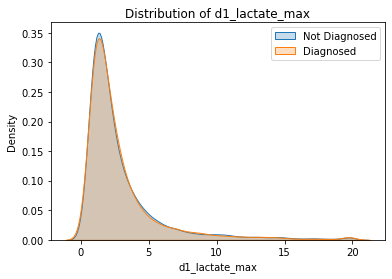

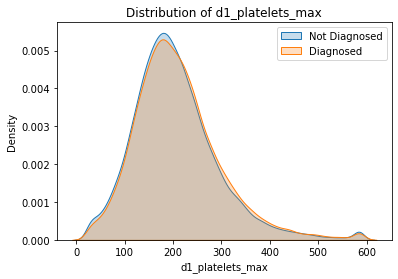

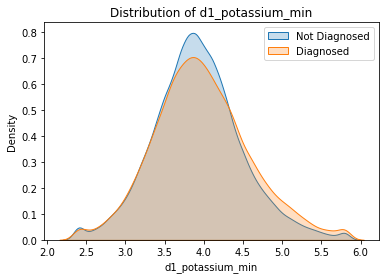

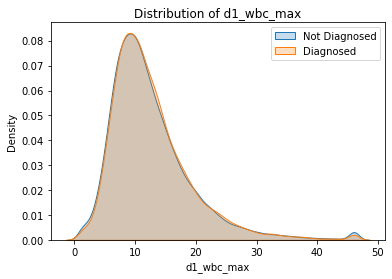

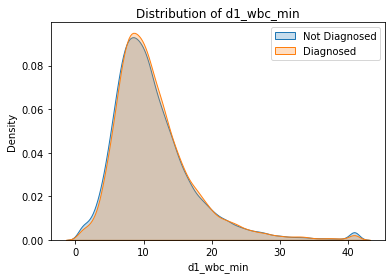

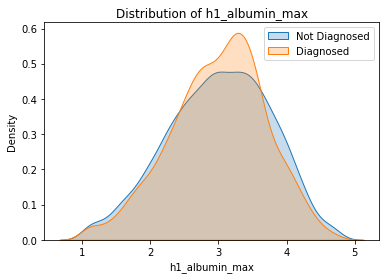

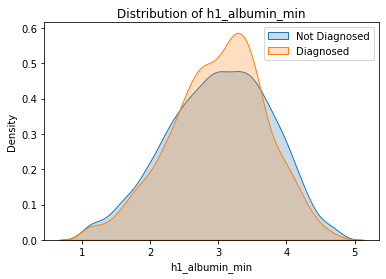

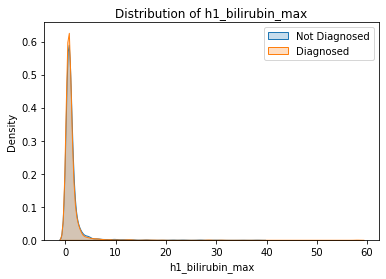

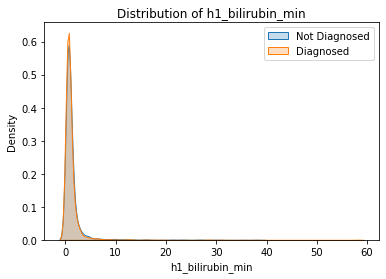

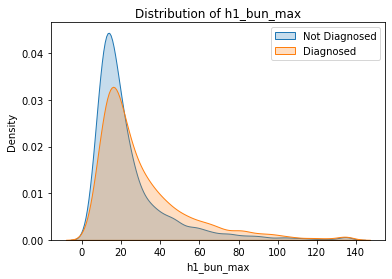

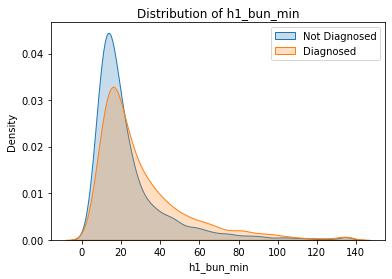

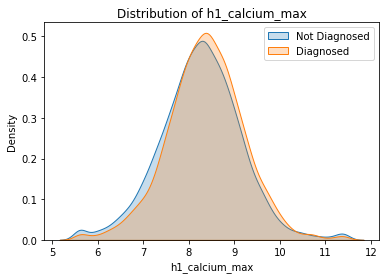

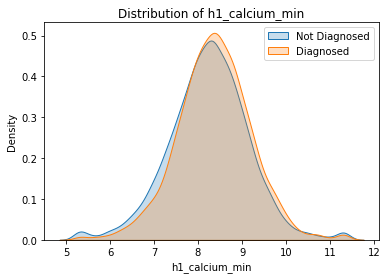

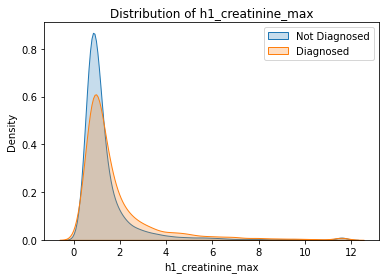

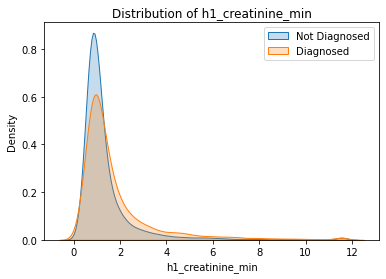

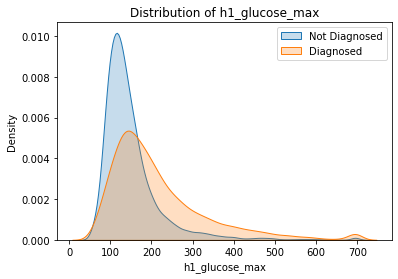

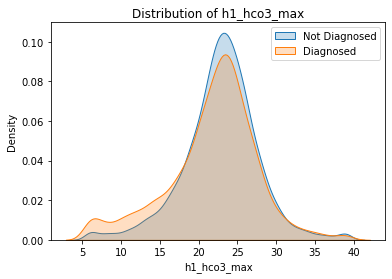

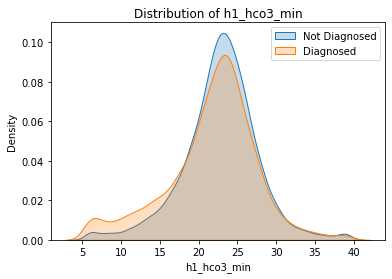

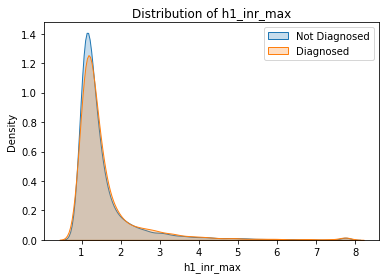

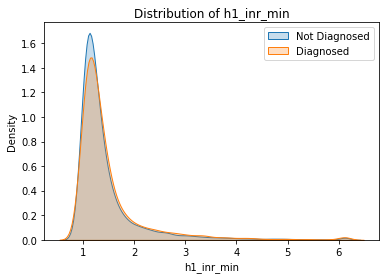

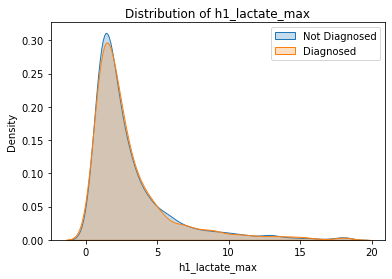

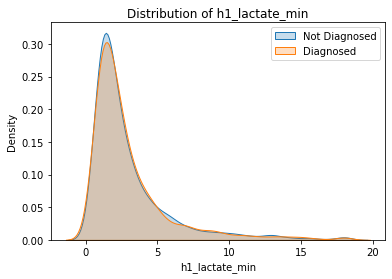

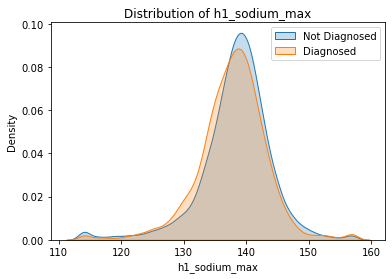

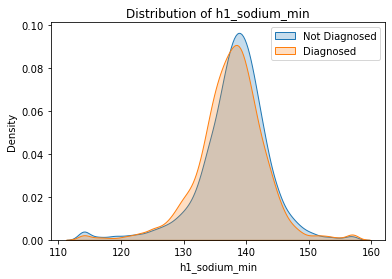

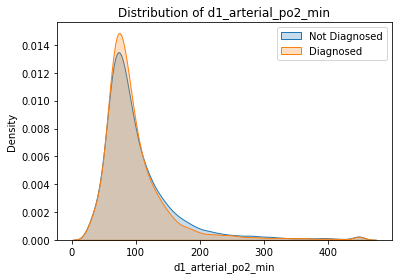

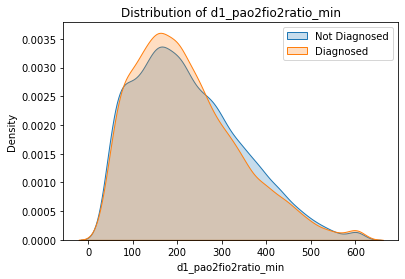

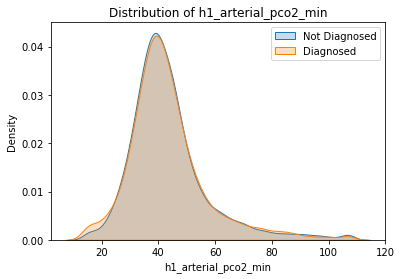

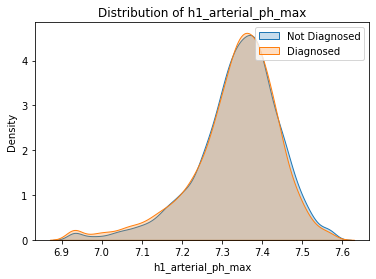

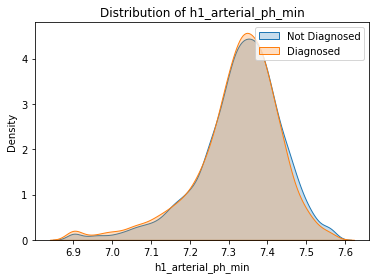

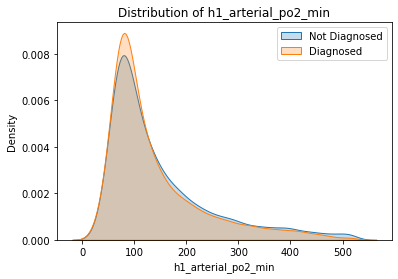

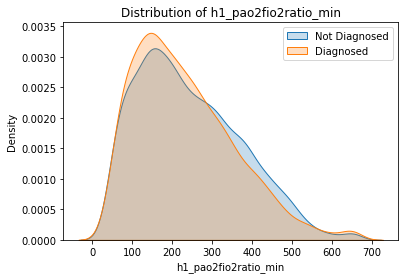

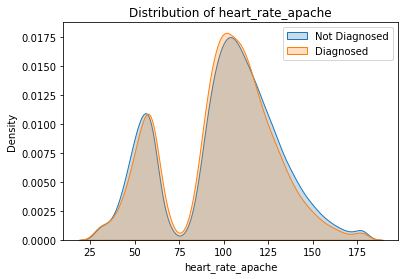

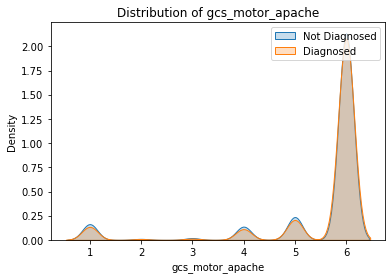

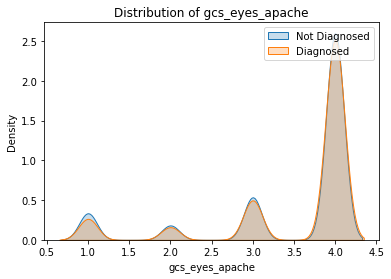

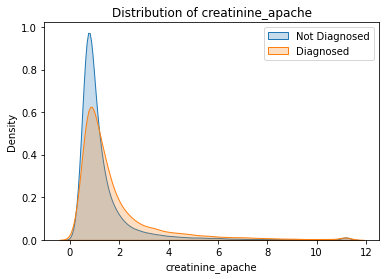

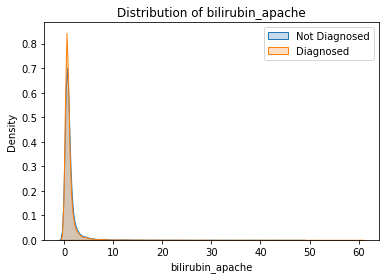

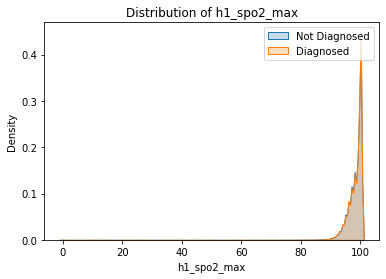

In [11]:
# Plot the Continuous Variables Against the Target Variable
#Seperate by the Target Variable 
diabetes_diagnosed = diabetes_data.loc[(diabetes_data.diabetes_mellitus==1)]
diabetes_notdiagnosed = diabetes_data.loc[(diabetes_data.diabetes_mellitus==0)]

# KDE plots
for column in continuous_columns:
    plt.figure()
    # produce a plot for each diagnosedlabel so they interlink
    sns.kdeplot(data=diabetes_notdiagnosed[column], label="Not Diagnosed",shade=True)
    sns.kdeplot(data=diabetes_diagnosed[column],label="Diagnosed", shade=True)
    #include a legend
    plt.legend()
    #include a dynamic title
    plt.title("Distribution of " +column)
    #Save the plot to the working directory
    #plt.savefig(column+'.jpg')

In [12]:
#Ascertain categories of Categorical variables 
for col in diabetes_data[categorical_columns]:
    print ("---- %s ---" % col)
    print (diabetes_data[col].value_counts())

---- encounter_id ---
276985    2
201746    2
195124    2
191926    1
152763    1
         ..
245138    1
264595    1
265797    1
263301    1
209541    1
Name: encounter_id, Length: 79156, dtype: int64
---- hospital_id ---
118    2712
19     2234
7      1862
188    1859
161    1692
       ... 
38        3
93        3
4         2
95        2
130       2
Name: hospital_id, Length: 203, dtype: int64
---- gender ---
M    42912
F    36217
Name: gender, dtype: int64
---- ethnicity ---
Caucasian           60378
African American     8802
Other/Unknown        3911
Hispanic             3138
Asian                1358
Native American       611
Name: ethnicity, dtype: int64
---- elective_surgery ---
0    64166
1    14993
Name: elective_surgery, dtype: int64
---- readmission_status ---
0    79159
Name: readmission_status, dtype: int64
---- icu_type ---
Med-Surg ICU    43608
MICU             6816
CCU-CTICU        6809
Neuro ICU        6077
Cardiac ICU      5069
SICU             4902
CSICU            

In [13]:
#Summary Statistics of Categorical Variables
# Obtain Summary Statistics of Categorical Variables 
StatsCat = diabetes_data[categorical_columns].mode()
StatsCat.index.names = ['Mode'] 

# Add summary statistics to the categorical variables. 
for column in categorical_columns:
    StatsCat.loc['Valid Count',column] = diabetes_data[column].count()
    StatsCat.loc['Num. Unique',column] = diabetes_data[column].nunique()
    StatsCat.loc['missing',column] = diabetes_data[column].isnull().sum()
print(StatsCat)

#Save to Excel
StatsCat.to_excel('statscat.xlsx')

             encounter_id  hospital_id gender  ethnicity  elective_surgery  \
Mode                                                                         
0                195124.0        118.0      M  Caucasian               0.0   
1                201746.0          NaN    NaN        NaN               NaN   
2                276985.0          NaN    NaN        NaN               NaN   
Valid Count       79159.0      79159.0  79129      78198           79159.0   
Num. Unique       79156.0        203.0      2          6               2.0   
missing               0.0          0.0     30        961               0.0   

             readmission_status      icu_type  intubated_apache     aids  \
Mode                                                                       
0                           0.0  Med-Surg ICU               0.0      0.0   
1                           NaN           NaN               NaN      NaN   
2                           NaN           NaN               NaN      Na

The encounter id shows three(3) modes (ids 276985, 201746 and 195124)  with 2 observations each, an indication of duplicated rows. The encounter id column also has 79156 unique rows out of the total 79159, thus, plotting would not be useful. 

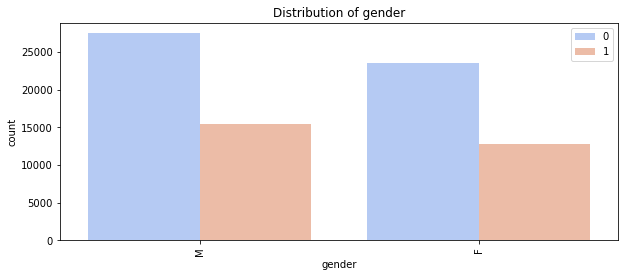

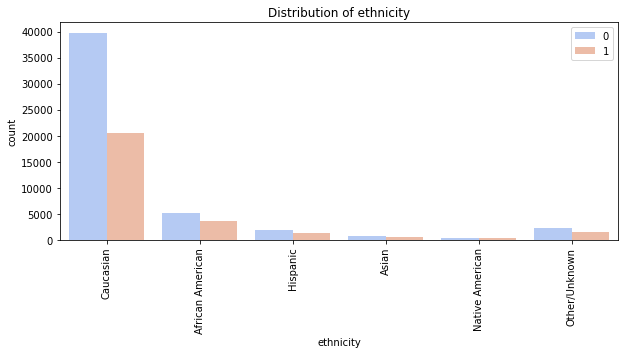

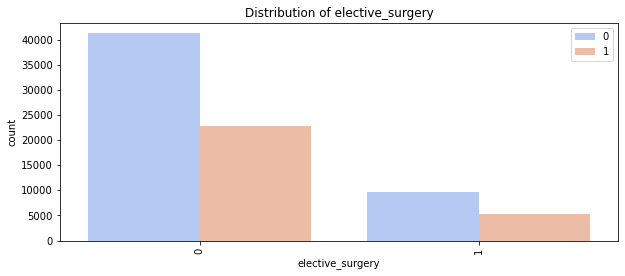

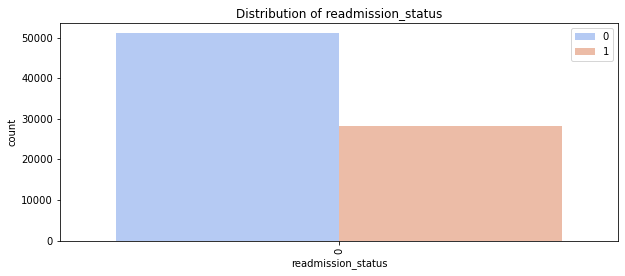

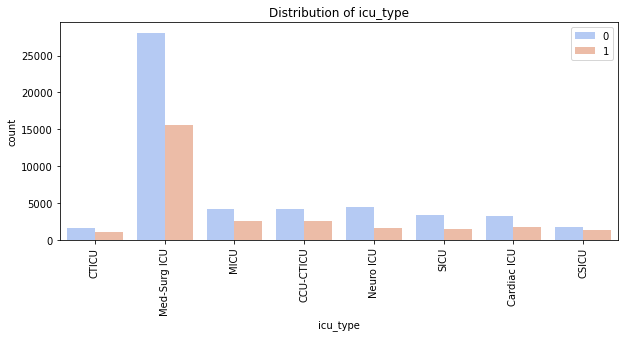

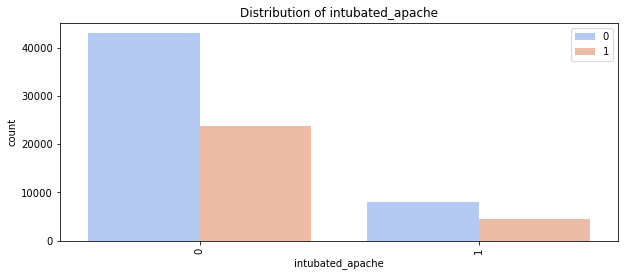

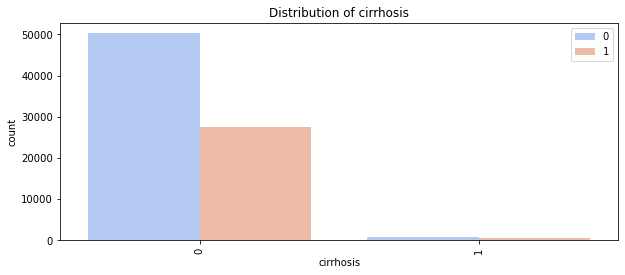

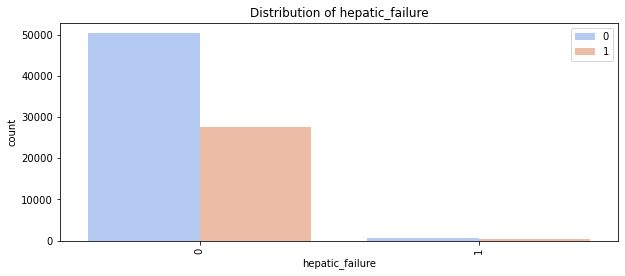

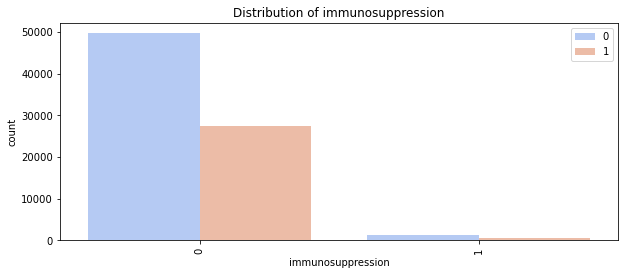

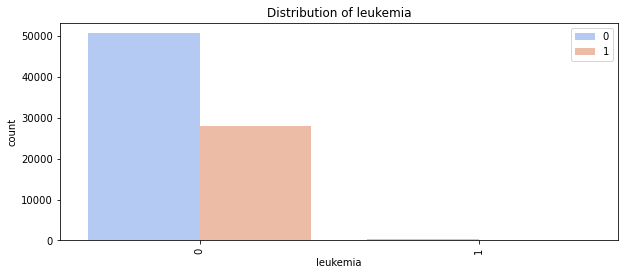

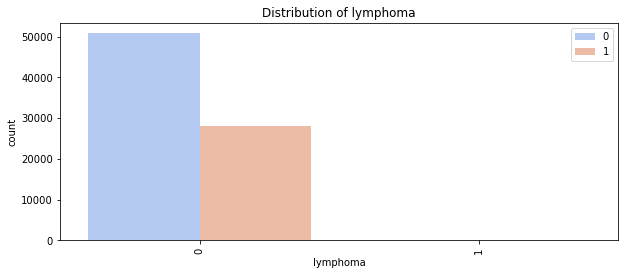

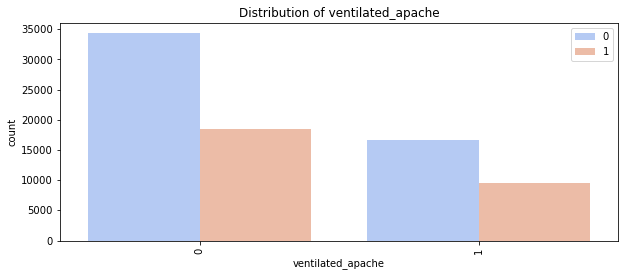

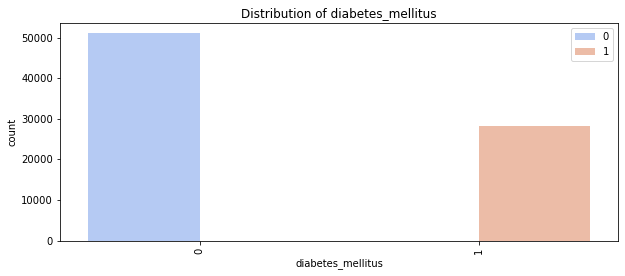

In [14]:
# Exclude the encounter and hospital id from the plot of categorical columns 
for column in categorical_columns[2:]:
    #make sure that plot only takes the two plots below by using the following command
    plt.figure(figsize=(10,4))
    plt.xticks(rotation=90) 
    # produce a plot for each label so they interlink
    sns.countplot(x=column, hue='diabetes_mellitus', palette="coolwarm", data=diabetes_data)
    #include a legend
    plt.legend()
    #include a dynamic title
    plt.title("Distribution of " +column)
    #Save the plot to the working directory
    #plt.savefig(column+'.jpg')

### Number of missing data in individual fields

In [15]:
diabetes_data.isnull().sum()

encounter_id                       0
hospital_id                        0
gender                            30
ethnicity                        961
age                             2842
elective_surgery                   0
height                          1181
weight                          2073
bmi                             2691
readmission_status                 0
icu_type                           0
h1_temp_max                    17936
h1_temp_min                    17936
d1_albumin_max                 43093
d1_albumin_min                 43093
d1_bilirubin_max               46477
d1_bilirubin_min               46477
d1_bun_max                      7910
d1_bun_min                      7910
d1_glucose_min                  4359
d1_hco3_max                    11901
d1_hco3_min                    11901
d1_inr_max                     49466
d1_inr_min                     49466
d1_lactate_max                 57809
d1_lactate_min                 57809
d1_platelets_max               11166
d

*__End of Section 1__*

## Section 2:  Cleansing or Pre-processing 

In this section, we only consider pre-processing that are allowed prior to data splitting. Thus, we would mainly focus on treating missing variables/observations (aside imputation). 

### Treating Duplicated Observations

In the previous section, we noted that the encounter Id had 3 duplicated observations. Here, we infer duplication from the whole dataset and remove the second duplicated values. 

In [16]:
#Drop duplicates
diabetes_data1 = diabetes_data.drop_duplicates()
print(diabetes_data1.shape)

(79156, 88)


Next we remove columns with at least 60% missing values. Such columns would not be useful for further analysis. Columns with 60% missing values would have only 40% valid observations. Thus, future data splitting has no intended effect when done at this stage. Here, we note that the target variable has no missing values and thus would not be affected. 

In [17]:
#Set threshold to remove columns
threshold = len(diabetes_data1) * 0.60

#Remove columns with at least 60% of missing values
diabetes_data2 = diabetes_data1.dropna(thresh=threshold, axis=1)
print(diabetes_data2.shape)

(79156, 44)


In [18]:
print("Number of Columns Before Dropping columns:", len(diabetes_data.columns))
print("Number of Columns After Dropping columns with at least 60% missing values:", len(diabetes_data2.columns))

Number of Columns Before Dropping columns: 88
Number of Columns After Dropping columns with at least 60% missing values: 44


44 columns with at least 60% missing values have been removed. The rest of the pre-processing/cleansing techniques ought to be performed on the split data to preserve the independence of the test data. The missing data variables are in the NaN format and thus no need to convert it to any format. 

*__Pre-processing still continues after train/test split__*

## Section 3:  Data Split, Feature Selection & Supervised Learning 

In this section, we do the train/test split, feature selection and then the supervised learning. It should also be noted that further __pre-processing and feature transformation__ would be done in this section, after the train/test split. 

In [19]:
#Reset Index on current dataset
data = diabetes_data2.reset_index()
data = data.loc[:,data.columns != 'index']

#Seperate Target and Feature Variables
y = data['diabetes_mellitus']
X = data.loc[:,data.columns != 'diabetes_mellitus']

print(X.index)
print(X.columns)

RangeIndex(start=0, stop=79156, step=1)
Index(['encounter_id', 'hospital_id', 'gender', 'ethnicity', 'age',
       'elective_surgery', 'height', 'weight', 'bmi', 'readmission_status',
       'icu_type', 'h1_temp_max', 'h1_temp_min', 'd1_bun_max', 'd1_bun_min',
       'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max',
       'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min',
       'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min',
       'wbc_apache', 'intubated_apache', 'd1_heartrate_max',
       'heart_rate_apache', 'gcs_motor_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache'],
      dtype='object')


In [20]:
# Import package for splitting
from sklearn.model_selection import train_test_split

# Without stratification divide into train and test set.
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=2022)

print("Train set description \n", train_X.describe())
print("Test set description \n",test_X.describe())

Train set description 
         encounter_id   hospital_id           age  elective_surgery  \
count   59367.000000  59367.000000  57254.000000      59367.000000   
mean   212860.194670    105.875857     62.471233          0.189213   
std     38136.891671     63.791643     16.450454          0.391681   
min    147001.000000      1.000000      0.000000          0.000000   
25%    179773.500000     48.000000     53.000000          0.000000   
50%    212855.000000    112.000000     65.000000          0.000000   
75%    245737.000000    165.000000     75.000000          0.000000   
max    278996.000000    204.000000     89.000000          1.000000   

             height        weight           bmi  readmission_status  \
count  58474.000000  57783.000000  57322.000000             59367.0   
mean     169.549304     85.155317     29.611050                 0.0   
std       10.842255     25.495936      8.487819                 0.0   
min      137.200000     38.600000     14.844926              

## Feature Selection Using Train Dataset

### Highly Correlated Features 

Set the threshold of highly correlated features to 95% and the second highly correlated feature.

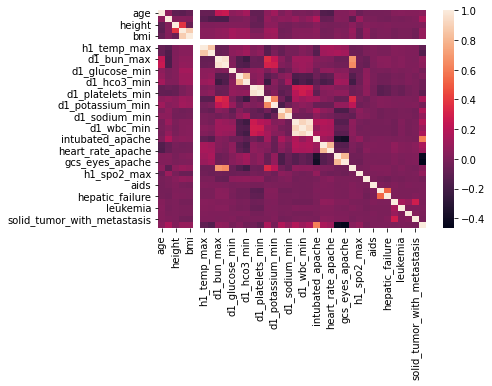

In [21]:
# Next we remove highly correlated Columns.
#Visualize the Correlation
sns.heatmap(train_X.iloc[:,2:].corr())
plt.show()

In [22]:
#Ascertain the numerical correlation
train_X.iloc[:,2:].corr()

age  elective_surgery    height    weight  \
age                          1.000000          0.057318 -0.106792 -0.119472   
elective_surgery             0.057318          1.000000  0.019894  0.024087   
height                      -0.106792          0.019894  1.000000  0.380206   
weight                      -0.119472          0.024087  0.380206  1.000000   
bmi                         -0.079166          0.013156 -0.064738  0.880585   
readmission_status                NaN               NaN       NaN       NaN   
h1_temp_max                 -0.075296         -0.120851  0.007779  0.034649   
h1_temp_min                 -0.077899         -0.159840  0.009154  0.037002   
d1_bun_max                   0.228853         -0.168348  0.015057  0.061597   
d1_bun_min                   0.260449         -0.167934  0.014478  0.068661   
d1_glucose_min               0.055564         -0.011318  0.018482  0.133200   
d1_hco3_max                  0.076439         -0.005634  0.020289  0.105019   
d1_hco3_min                  0.125837          0.014249  0.015287  0.105566   
d1_platelets_max            -0.088903         -0.060610 -0.078974 -0.010875   
d1_platelets_min            -0.087166         -0.093321 -0.079178 -0.008729   
d1_potassium_max             0.052337          0.074276  0.050549  0.108735   
d1_potassium_min             0.117639          0.032271  0.054937  0.119407   
d1_sodium_max                0.002069          0.060604 -0.026799 -0.043479   
d1_sodium_min                0.047903          0.045633 -0.030947 -0.031045   
d1_wbc_max                  -0.013162          0.093497 -0.005369  0.022555   
d1_wbc_min                  -0.010645          0.033491 -0.012308  0.022809   
wbc_apache                  -0.019798          0.073151 -0.007334  0.026798   
intubated_apache             0.007682          0.171022  0.028517  0.050748   
d1_heartrate_max            -0.144680         -0.077159 -0.016460 -0.032651   
heart_rate_apache           -0.157892         -0.070016 -0.019084 -0.028172   
gcs_motor_apache             0.020516          0.026092 -0.015468  0.014647   
gcs_eyes_apache              0.020333          0.018668 -0.011557  0.004439   
creatinine_apache            0.055897         -0.113175  0.053344  0.091503   
h1_spo2_max                 -0.060774          0.100648 -0.012528 -0.068733   
map_apache                  -0.021681         -0.004577  0.032734  0.070349   
aids                        -0.025005         -0.010716  0.010696 -0.015879   
cirrhosis                   -0.025902         -0.028437  0.009808  0.003591   
hepatic_failure             -0.018053         -0.031603  0.010789  0.005357   
immunosuppression            0.022917         -0.011763  0.000917 -0.026949   
leukemia                     0.029765         -0.015710  0.003361 -0.011580   
lymphoma                     0.026043         -0.004536  0.000400 -0.008272   
solid_tumor_with_metastasis  0.024031          0.008718  0.003201 -0.037819   
ventilated_apache            0.040512          0.152734  0.012113  0.081458   

                                  bmi  readmission_status  h1_temp_max  \
age                         -0.079166                 NaN    -0.075296   
elective_surgery             0.013156                 NaN    -0.120851   
height                      -0.064738                 NaN     0.007779   
weight                       0.880585                 NaN     0.034649   
bmi                          1.000000                 NaN     0.033239   
readmission_status                NaN                 NaN          NaN   
h1_temp_max                  0.033239                 NaN     1.000000   
h1_temp_min                  0.035119                 NaN     0.860175   
d1_bun_max                   0.058867                 NaN    -0.080193   
d1_bun_min                   0.067190                 NaN    -0.070095   
d1_glucose_min               0.132126                 NaN     0.045819   
d1_hco3_max                  0.104517                 NaN     0.

This approach and general structure of the code was adopted from Albon(2017). Albon, F. (2017). Drop Highly Correlated Features. Available at https://chrisalbon.com/code/machine_learning/feature_selection/drop_highly_correlated_features/

In [23]:
#Ascertain Highly Correlated Columns to drop. 
# Create absolute correlation matrix
corr_matrix = train_X.iloc[:,2:].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

['d1_bun_min', 'd1_platelets_min', 'wbc_apache']


In [24]:
# Drop highly correlated features from training data
train_X_dcor = train_X.drop(train_X[to_drop], axis = 1)
test_X_dcor = test_X[train_X_dcor.columns]

train_X_dcor.columns

Index(['encounter_id', 'hospital_id', 'gender', 'ethnicity', 'age',
       'elective_surgery', 'height', 'weight', 'bmi', 'readmission_status',
       'icu_type', 'h1_temp_max', 'h1_temp_min', 'd1_bun_max',
       'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'intubated_apache',
       'd1_heartrate_max', 'heart_rate_apache', 'gcs_motor_apache',
       'gcs_eyes_apache', 'creatinine_apache', 'h1_spo2_max', 'map_apache',
       'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia',
       'lymphoma', 'solid_tumor_with_metastasis', 'ventilated_apache'],
      dtype='object')

### Missing Value imputation

Categorical features were imputed with the most frequent observation whiles the numeric obervations were imputed with the median. This approach and general structure of the code was adapted from Amr(2020). Amr, T. (2020). _Machine Learning with scikit-learn and Scientific Python Toolkits_.
Packt Publishing Ltd: Birmingham, UK.

In [25]:
class ColumnNamesKeeper:
    def __init__(self, transformer):
        self.columns = None
        self.transformer = transformer
    def fit(self, x, y=None):
        self._columns = x.columns
        self.transformer.fit(x)
    def transform(self, x, y=None):
        x = self.transformer.transform(x)
        return pd.DataFrame(x, columns=self._columns)
    def fit_transform(self, x, y=None):
        self.fit(x,y)
        return self.transform(x)

In [26]:
# Define string and numerical columns for the imputation
##Differentiate between numerical and categorical(string) features 
#Create a dictionary 
features = { 'string' : list(train_X_dcor.select_dtypes(include=['object']).columns), 
            'numerical' : list(train_X_dcor.select_dtypes(exclude=['object']).columns), }

features['all'] = features['string'] + features['numerical']

print(features)

{'string': ['gender', 'ethnicity', 'icu_type'], 'numerical': ['encounter_id', 'hospital_id', 'age', 'elective_surgery', 'height', 'weight', 'bmi', 'readmission_status', 'h1_temp_max', 'h1_temp_min', 'd1_bun_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'intubated_apache', 'd1_heartrate_max', 'heart_rate_apache', 'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache', 'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'ventilated_apache'], 'all': ['gender', 'ethnicity', 'icu_type', 'encounter_id', 'hospital_id', 'age', 'elective_surgery', 'height', 'weight', 'bmi', 'readmission_status', 'h1_temp_max', 'h1_temp_min', 'd1_bun_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium

In [27]:
#Import the packages
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numerical_mputer = ColumnNamesKeeper(SimpleImputer(missing_values=np.nan, strategy='median'))
string_mputer = ColumnNamesKeeper(SimpleImputer(missing_values=np.nan, strategy='most_frequent'))

numerical_pipeline = Pipeline([('numerical_mputer', numerical_mputer)])
string_pipeline = Pipeline([('string_mputer', string_mputer)])

In [28]:
#Concatenate the varaibles 
train_X_imp = pd.concat([numerical_pipeline.fit_transform(train_X_dcor[features['numerical']]),
                         string_pipeline.fit_transform(train_X_dcor[features['string']]),],axis = 1)

test_X_imp = pd.concat([numerical_pipeline.fit_transform(test_X_dcor[features['numerical']]),
                        string_pipeline.fit_transform(test_X_dcor[features['string']]),],axis = 1)

In [29]:
# Check for current missing observations
print(train_X_imp.isnull().sum())
print(test_X_imp.isnull().sum())

encounter_id                   0
hospital_id                    0
age                            0
elective_surgery               0
height                         0
weight                         0
bmi                            0
readmission_status             0
h1_temp_max                    0
h1_temp_min                    0
d1_bun_max                     0
d1_glucose_min                 0
d1_hco3_max                    0
d1_hco3_min                    0
d1_platelets_max               0
d1_potassium_max               0
d1_potassium_min               0
d1_sodium_max                  0
d1_sodium_min                  0
d1_wbc_max                     0
d1_wbc_min                     0
intubated_apache               0
d1_heartrate_max               0
heart_rate_apache              0
gcs_motor_apache               0
gcs_eyes_apache                0
creatinine_apache              0
h1_spo2_max                    0
map_apache                     0
aids                           0
cirrhosis 

In [30]:
#Reset index of y in both train and test set
train_y_inset = train_y.to_frame().reset_index()
train_y_inset = train_y_inset.loc[:,train_y_inset.columns != 'index']
test_y_inset = test_y.to_frame().reset_index()
test_y_inset = test_y_inset.loc[:,test_y_inset.columns != 'index']

print(train_y_inset.index)
print(test_y_inset.index)

RangeIndex(start=0, stop=59367, step=1)
RangeIndex(start=0, stop=19789, step=1)


In [31]:
#Concatenate into a single excel
train_part = train_X_imp.join(train_y_inset)
print(train_part.columns)
print(train_part.shape)
test_part = test_X_imp.join(test_y_inset)
print(test_part.columns)
print(test_part.shape)

Index(['encounter_id', 'hospital_id', 'age', 'elective_surgery', 'height',
       'weight', 'bmi', 'readmission_status', 'h1_temp_max', 'h1_temp_min',
       'd1_bun_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_platelets_max', 'd1_potassium_max', 'd1_potassium_min',
       'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min',
       'intubated_apache', 'd1_heartrate_max', 'heart_rate_apache',
       'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache',
       'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache', 'gender',
       'ethnicity', 'icu_type', 'diabetes_mellitus'],
      dtype='object')
(59367, 41)
Index(['encounter_id', 'hospital_id', 'age', 'elective_surgery', 'height',
       'weight', 'bmi', 'readmission_status', 'h1_temp_max', 'h1_temp_min',
       'd1_bun_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
    

In [32]:
#Stack train_part and test partition into one dataframe to be exported into Excel as the cleansed dataset
cleaned_data = pd.concat([train_part, test_part])
print(cleaned_data.shape)
print(cleaned_data.head())
print(cleaned_data.tail())

(79156, 41)
   encounter_id  hospital_id   age  elective_surgery  height  weight  \
0      267769.0        149.0  72.0               0.0   168.9    81.6   
1      151453.0        185.0  71.0               0.0   167.6    81.8   
2      175431.0          2.0  76.0               0.0   165.1    54.4   
3      157739.0         30.0  31.0               0.0   180.0    85.7   
4      239554.0        175.0  32.0               0.0   167.0   104.3   

         bmi  readmission_status  h1_temp_max  h1_temp_min  d1_bun_max  \
0  28.039261                 0.0         36.4         36.4        53.0   
1  29.120932                 0.0         37.2         37.2        21.0   
2  19.957436                 0.0         36.6         36.5        36.0   
3  26.450617                 0.0         36.7         36.7        11.0   
4  37.398257                 0.0         37.2         37.2        12.0   

   d1_glucose_min  d1_hco3_max  d1_hco3_min  d1_platelets_max  \
0            98.0         24.0         15.0  

In [33]:
#Export Pre-processed Data into Excel
cleaned_data.to_excel('Cleaned_data.xlsx', index = False)

Further, we scale the numerical values and one-hot encode the string categorical variables.  

In [34]:
#Import the packages
from category_encoders.one_hot import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

# Scaling Function
robust_scaler = ColumnNamesKeeper(RobustScaler())

#One-Hot encoding 
onehot_encoder = OneHotEncoder(cols=features['string'], handle_unknown='value', use_cat_names=True )

numerical_pipeline = Pipeline([ ('robust_scaler', robust_scaler)])
string_pipeline = Pipeline([('onehot_encoder', onehot_encoder)])

In [35]:
#Concatenate the varaibles 
train_X_scaled = pd.concat([numerical_pipeline.fit_transform(train_X_imp[features['numerical']]),
                         string_pipeline.fit_transform(train_X_imp[features['string']]),],axis = 1)

test_X_scaled = pd.concat([numerical_pipeline.fit_transform(test_X_imp[features['numerical']]),
                        string_pipeline.fit_transform(test_X_imp[features['string']]),],axis = 1)

In [36]:
#Observe the newly transformed train data
train_X_scaled.head()

encounter_id  hospital_id       age  elective_surgery    height    weight  \
0      0.832491     0.316239  0.318182               0.0 -0.071895  0.000000   
1     -0.930848     0.623932  0.272727               0.0 -0.156863  0.006689   
2     -0.567344    -0.940171  0.500000               0.0 -0.320261 -0.909699   
3     -0.835553    -0.700855 -1.545455               0.0  0.653595  0.137124   
4      0.404754     0.538462 -1.500000               0.0 -0.196078  0.759197   

        bmi  readmission_status  h1_temp_max  h1_temp_min  d1_bun_max  \
0  0.000000                 0.0        -0.75    -0.625000    1.941176   
1  0.118259                 0.0         1.25     1.041667    0.058824   
2 -0.883586                 0.0        -0.25    -0.416667    0.941176   
3 -0.173686                 0.0         0.00     0.000000   -0.529412   
4  1.023219                 0.0         1.25     1.041667   -0.470588   

   d1_glucose_min  d1_hco3_max  d1_hco3_min  d1_platelets_max  \
0          -0.275         0.00         -1.6         -0.428571   
1           1.025         1.25          1.2          0.107143   
2           0.200         1.25          1.2         -1.880952   
3          -0.050         0.50          0.6          0.273810   
4          -0.750         0.00          0.0          1.142857   

   d1_potassium_max  d1_potassium_min  d1_sodium_max  d1_sodium_min  \
0          2.833333         -0.166667          -0.50          -1.50   
1         -1.000000         -0.500000           0.00           0.25   
2          0.500000          1.000000           1.00           1.25   
3         -0.666667         -0.166667           0.50           0.75   
4         -0.333333         -0.166667          -0.25           0.00   

   d1_wbc_max  d1_wbc_min  intubated_apache  d1_heartrate_max  \
0   -0.516667   -0.423077               0.0         -0.034483   
1    0.166667    0.365385               0.0         -0.172414   
2   -1.383333   -1.423077               0.0          1.034483   
3    0.415000    0.651923               0.0         -0.517241   
4   -0.100000   -0.461538               0.0         -0.482759   

   heart_rate_apache  gcs_motor_apache  ...  map_apache  aids  cirrhosis  \
0          -0.121212               0.0  ...   -0.112676   0.0        0.0   
1           0.272727               0.0  ...    1.830986   0.0        0.0   
2           0.969697               0.0  ...   -0.197183   0.0        0.0   
3          -1.242424               0.0  ...   -0.070423   0.0        0.0   
4          -0.030303               0.0  ...    0.000000   0.0        0.0   

   hepatic_failure  immunosuppression  leukemia  lymphoma  \
0              0.0                0.0       0.0       0.0   
1              0.0                0.0       0.0       0.0   
2              0.0                0.0       0.0       0.0   
3              0.0                0.0       0.0       0.0   
4              0.0                0.0       0.0       0.0   

   solid_tumor_with_metastasis  ventilated_apache  gender_F  gender_M  \
0                          0.0                0.0         1         0   
1                          0.0                0.0         1         0   
2                          0.0                0.0         1         0   
3                          0.0                0.0         0         1   
4                          0.0                0.0         0         1   

   ethnicity_Caucasian  ethnicity_African American  ethnicity_Other/Unknown  \
0                    1                           0                        0   
1                    1                           0                        0   
2                    1                           0                        0   
3                    1                           0                        0   
4                    0                           1                        0   

   ethnicity_Native American  ethnicity_Asian  ethnicity_Hispanic  \
0                          0                0                   0  

In [37]:
#Observe the newly transformed test data
test_X_scaled.head()

encounter_id  hospital_id       age  elective_surgery    height    weight  \
0     -0.468762     0.156522 -1.333333               0.0  0.328947 -0.449324   
1     -0.780117     0.539130 -0.190476               0.0  0.177632  1.549324   
2      0.817416     0.408696  0.285714               0.0  0.000000 -0.729730   
3     -0.738955     0.347826  0.619048               0.0  0.855263  0.905405   
4      0.136591     0.626087  0.428571               0.0 -1.157895 -0.689189   

        bmi  readmission_status  h1_temp_max  h1_temp_min  d1_bun_max  \
0 -0.629236                 0.0        -0.25    -0.204545   -0.647059   
1  1.620271                 0.0        -3.50    -2.863636    0.000000   
2 -0.798860                 0.0        -6.50    -5.318182    0.000000   
3  0.479009                 0.0         0.00     0.000000    1.411765   
4 -0.183594                 0.0        -2.75    -2.250000    4.117647   

   d1_glucose_min  d1_hco3_max  d1_hco3_min  d1_platelets_max  \
0          -0.250          0.0          0.2          1.000000   
1           2.400          0.0          0.0          0.000000   
2           0.500          1.0          0.6          0.195122   
3          -0.650          0.5          0.6         -0.585366   
4           1.325         -1.5         -1.2          0.036585   

   d1_potassium_max  d1_potassium_min  d1_sodium_max  d1_sodium_min  \
0          0.166667          0.666667           0.75            0.8   
1          0.000000          0.000000           0.00            0.0   
2         -0.500000         -0.166667           1.50            0.6   
3          2.166667          2.666667           0.00            0.2   
4          2.500000          1.833333          -1.25           -1.0   

   d1_wbc_max  d1_wbc_min  intubated_apache  d1_heartrate_max  \
0    0.150000    0.372549               0.0         -0.285714   
1    0.000000    0.000000               0.0         -0.250000   
2   -0.316667   -0.176471               1.0          0.714286   
3   -0.883333   -0.843137               0.0         -0.678571   
4   -0.200000   -0.372549               0.0          0.857143   

   heart_rate_apache  gcs_motor_apache  ...  map_apache  aids  cirrhosis  \
0          -0.333333               0.0  ...    0.785714   0.0        0.0   
1           0.454545               0.0  ...    0.814286   0.0        0.0   
2           0.151515               0.0  ...   -0.042857   0.0        0.0   
3          -1.333333               0.0  ...    0.014286   0.0        0.0   
4           0.424242               0.0  ...   -0.328571   0.0        0.0   

   hepatic_failure  immunosuppression  leukemia  lymphoma  \
0              0.0                0.0       0.0       0.0   
1              0.0                0.0       0.0       0.0   
2              0.0                0.0       0.0       0.0   
3              0.0                0.0       0.0       0.0   
4              1.0                0.0       0.0       0.0   

   solid_tumor_with_metastasis  ventilated_apache  gender_F  gender_M  \
0                          0.0                0.0         1         0   
1                          0.0                0.0         0         1   
2                          0.0                1.0         1         0   
3                          0.0                1.0         0         1   
4                          0.0                0.0         1         0   

   ethnicity_Caucasian  ethnicity_African American  ethnicity_Hispanic  \
0                    1                           0                   0   
1                    1                           0                   0   
2                    1                           0                   0   
3                    1                           0                   0   
4                    1                           0                   0   

   ethnicity_Native American  ethnicity_Other/Unknown  ethnicity_Asian  \
0                          0                        0                0   
1                 

## Feature Selection

### Generality of Findings
The encounter and hospital ID columns are specific to the dataset and would cause overfitting in the current dataset but would perform poorly with general diabetes diagnosis. The descriptive statistics of the train dataset above confirm that assertion. Both variables ought to be categorical but have high variability. 

In [38]:
#Generate General train_X for features (removing encounter Id and hospital ID)
train_X_gen = train_X_scaled.iloc[:,2:]
#replicate the training data columns on the test dataset
test_X_gen = test_X_scaled[train_X_gen.columns]
print(train_X_gen.columns)
print(test_X_gen.columns)

Index(['age', 'elective_surgery', 'height', 'weight', 'bmi',
       'readmission_status', 'h1_temp_max', 'h1_temp_min', 'd1_bun_max',
       'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'intubated_apache',
       'd1_heartrate_max', 'heart_rate_apache', 'gcs_motor_apache',
       'gcs_eyes_apache', 'creatinine_apache', 'h1_spo2_max', 'map_apache',
       'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia',
       'lymphoma', 'solid_tumor_with_metastasis', 'ventilated_apache',
       'gender_F', 'gender_M', 'ethnicity_Caucasian',
       'ethnicity_African American', 'ethnicity_Other/Unknown',
       'ethnicity_Native American', 'ethnicity_Asian', 'ethnicity_Hispanic',
       'icu_type_SICU', 'icu_type_Med-Surg ICU', 'icu_type_CCU-CTICU',
       'icu_type_Neuro ICU', 'icu_type_MICU', 'icu_type_Cardiac ICU',
       'icu_type_CSICU',

### Variance Threshold
Next, features with variance threshold less than 0.005 are removed. Such features add to model complexity but not to predictive power.

In [39]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 0.005)

#Fit
_ = vt.fit(train_X_gen)

#Get the mask
mask = vt.get_support()

#Subset the dataset
train_X_vt = train_X_gen.loc[:, mask]
train_X_vt.shape

(59367, 48)

In [40]:
#Replicate remaining columns in test dataset
test_X_vt = test_X_gen[train_X_vt.columns]
test_X_vt.shape

(19789, 48)

## Mutual Information 

Use mutual information algorithm for the main feature selection.This approach and general structure of the code was adapted from Amr(2020). Amr, T. (2020). _Machine Learning with scikit-learn and Scientific Python Toolkits_.
Packt Publishing Ltd: Birmingham, UK.

In [41]:
#Ascertain mutual importance information 
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(train_X_vt, train_y_inset, random_state = 2022)

In [42]:
#Arrange the mutual information importance of the features
pd.DataFrame({'Feature': train_X_vt.columns,'MI': mi,}).sort_values('MI', 
                                                                    ascending=False).style.bar(subset=['MI'],color='grey')

In [43]:
#Subset features with mi greater than zero
train_X_mi = train_X_vt[train_X_vt.columns[mi>0.0]]
train_X_mi.head()

age    height    weight       bmi  h1_temp_min  d1_bun_max  \
0  0.318182 -0.071895  0.000000  0.000000    -0.625000    1.941176   
1  0.272727 -0.156863  0.006689  0.118259     1.041667    0.058824   
2  0.500000 -0.320261 -0.909699 -0.883586    -0.416667    0.941176   
3 -1.545455  0.653595  0.137124 -0.173686     0.000000   -0.529412   
4 -1.500000 -0.196078  0.759197  1.023219     1.041667   -0.470588   

   d1_glucose_min  d1_hco3_max  d1_hco3_min  d1_potassium_max  \
0          -0.275         0.00         -1.6          2.833333   
1           1.025         1.25          1.2         -1.000000   
2           0.200         1.25          1.2          0.500000   
3          -0.050         0.50          0.6         -0.666667   
4          -0.750         0.00          0.0         -0.333333   

   d1_potassium_min  d1_sodium_max  d1_sodium_min  d1_wbc_max  d1_wbc_min  \
0         -0.166667          -0.50          -1.50   -0.516667   -0.423077   
1         -0.500000           0.00           0.25    0.166667    0.365385   
2          1.000000           1.00           1.25   -1.383333   -1.423077   
3         -0.166667           0.50           0.75    0.415000    0.651923   
4         -0.166667          -0.25           0.00   -0.100000   -0.461538   

   heart_rate_apache  gcs_eyes_apache  creatinine_apache  map_apache  \
0          -0.121212              0.0           3.573770   -0.112676   
1           0.272727              0.0           0.163934    1.830986   
2           0.969697              0.0          -0.327869   -0.197183   
3          -1.242424              0.0           0.163934   -0.070423   
4          -0.030303              0.0           0.065574    0.000000   

   hepatic_failure  gender_F  gender_M  ethnicity_Caucasian  \
0              0.0         1         0                    1   
1              0.0         1         0                    1   
2              0.0         1         0                    1   
3              0.0         0         1                    1   
4              0.0         0         1                    0   

   ethnicity_African American  ethnicity_Native American  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           1                          0   

   icu_type_Med-Surg ICU  icu_type_CCU-CTICU  icu_type_Neuro ICU  \
0                      0                   0                   0   
1                      1                   0                   0   
2                      1                   0                   0   
3                      1                   0                   0   
4                      0                   1                   0   

   icu_type_Cardiac ICU  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

#### Dropping of variables by inspection
bmi is computed using weight and height. Thus, with weight and height info, bmi can be calculated. Thus, we drop bmi. 
The gender variable has both for males and females; we drop gender_M which had a lower information criteria. We drop Ethnicity Native American (with near zero information) which had lower information criteria than the two(2) other ethnicities. 

In [44]:
mi_to_drop = ['gender_M', 'bmi', 'ethnicity_Native American']

#Drop in training set
train_X_ins = train_X_mi.drop(train_X_mi[mi_to_drop], axis = 1)
#Update the test set
test_X_ins = test_X_vt[train_X_ins.columns]

#Ascertain remaining columns
test_X_ins.columns

Index(['age', 'height', 'weight', 'h1_temp_min', 'd1_bun_max',
       'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'heart_rate_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'map_apache', 'hepatic_failure', 'gender_F',
       'ethnicity_Caucasian', 'ethnicity_African American',
       'icu_type_Med-Surg ICU', 'icu_type_CCU-CTICU', 'icu_type_Neuro ICU',
       'icu_type_Cardiac ICU'],
      dtype='object')

## Balancing the Train Set

In [45]:
train_y_inset.value_counts()

diabetes_mellitus
0                    38342
1                    21025
dtype: int64

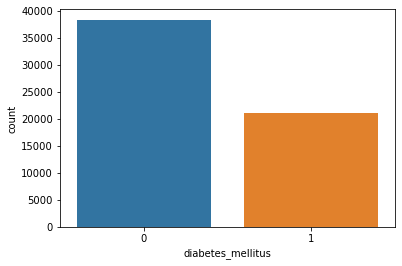

In [46]:
#Show distribution before balancing
sns.countplot(x= 'diabetes_mellitus', data=train_y_inset)
plt.show()

In [47]:
from sklearn.utils import resample

#The first thing is contatenate our training data back together.  
resampling = train_X_ins
resampling['diabetes_mellitus']= train_y_inset.values

# separate minority and majority classes
majority_class = resampling[resampling['diabetes_mellitus']==0]
minority_class = resampling[resampling['diabetes_mellitus']==1]

# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=True,     # sample with replacement
                                 n_samples=38342,     # to match majority class
                                 random_state=2022) # reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority_class, minority_upsampled])

# Show dataset statistics
print(upsampled.describe())
 
# Display new class counts
upsampled.diabetes_mellitus.value_counts()

                age        height        weight   h1_temp_min    d1_bun_max  \
count  76684.000000  76684.000000  76684.000000  76684.000000  76684.000000   
mean      -0.088993     -0.034154      0.158483     -0.150180      0.403760   
std        0.718246      0.704503      0.853640      1.457606      1.206056   
min       -2.954545     -2.143791     -1.438127     -7.916667     -0.941176   
25%       -0.500000     -0.490196     -0.434783     -0.625000     -0.352941   
50%        0.000000      0.000000      0.001338      0.000000      0.000000   
75%        0.454545      0.509804      0.605351      0.270833      0.705882   
max        1.090909      1.672549      3.491639      5.416667      6.235294   

       d1_glucose_min   d1_hco3_max   d1_hco3_min  d1_potassium_max  \
count    76684.000000  76684.000000  76684.000000      76684.000000   
mean         0.208845      0.088052     -0.000605          0.152337   
std          1.038763      1.023133      0.968637          1.091184   
min 

0    38342
1    38342
Name: diabetes_mellitus, dtype: int64

In [48]:
#Show distribution of the balanced class on train data
sns.countplot(x= 'diabetes_mellitus', data=upsampled)
plt.show()

In [49]:
#Obtain the new train data from the downsampled dataset. 
y_train = upsampled['diabetes_mellitus']
X_train = upsampled.loc[:,upsampled.columns != 'diabetes_mellitus']

#Rename test sets for consistency
X_test = test_X_ins
y_test = test_y_inset

print(y_train.head())
print(X_train.head())

1    0
2    0
3    0
4    0
5    0
Name: diabetes_mellitus, dtype: int64
        age    height    weight  h1_temp_min  d1_bun_max  d1_glucose_min  \
1  0.272727 -0.156863  0.006689     1.041667    0.058824           1.025   
2  0.500000 -0.320261 -0.909699    -0.416667    0.941176           0.200   
3 -1.545455  0.653595  0.137124     0.000000   -0.529412          -0.050   
4 -1.500000 -0.196078  0.759197     1.041667   -0.470588          -0.750   
5  0.363636 -0.320261 -0.220736    -2.708333    0.235294          -0.350   

   d1_hco3_max  d1_hco3_min  d1_potassium_max  d1_potassium_min  \
1         1.25          1.2         -1.000000         -0.500000   
2         1.25          1.2          0.500000          1.000000   
3         0.50          0.6         -0.666667         -0.166667   
4         0.00          0.0         -0.333333         -0.166667   
5        -0.50         -1.2          1.666667          1.833333   

   d1_sodium_max  d1_sodium_min  d1_wbc_max  d1_wbc_min  heart_rate

## Supervised Learning

#### Assessing Performance of SVC, Random Forest, KNeighbors Classifier & Ensemble of the three (with the resampled train set)

In [50]:
# Import the necessary libraries 
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score
from imblearn.metrics import geometric_mean_score

clf1 = SVC(random_state = 2022)
clf2 = RandomForestClassifier(random_state = 2022)
clf3 = KNeighborsClassifier()

# pack the classifiers and string into a list of tuples to form the simple ensemble
ensemble_clf = VotingClassifier(
    [("SVM", clf1), ("Random Forest", clf2), ("kNN", clf3)],
    voting="hard")

In [51]:
#Ascertain the performance of these four(4) models
for name, clf  in [("SVM", clf1), ("Random Forest", clf2), ("kNN", clf3), ("Ensemble", ensemble_clf)]:
    clf.fit(X_train, y_train)
    score = geometric_mean_score(y_test, clf.predict(X_test))
    print(f"{name} geometric mean score: {score}")
    score2 = precision_score(y_test, clf.predict(X_test))
    print(f"{name} precision score: {score2}")
    score3 = recall_score(y_test, clf.predict(X_test))
    print(f"{name} recall score: {score3}")
    score4 = f1_score(y_test, clf.predict(X_test))
    print(f"{name} f1 score: {score4}")
    score5 = fbeta_score(y_test, clf.predict(X_test), beta = 2)
    print(f"{name} f2 score: {score5}")

SVM geometric mean score: 0.6748161730471288
SVM precision score: 0.5510325892324222
SVM recall score: 0.6477687342127421
SVM f1 score: 0.5954976456169774
SVM f2 score: 0.6257964805726525
Random Forest geometric mean score: 0.598590251255996
Random Forest precision score: 0.6410312431723837
Random Forest recall score: 0.4117316867808027
Random Forest f1 score: 0.5014098948987439
Random Forest f2 score: 0.44345696925727757
kNN geometric mean score: 0.6021389108596916
kNN precision score: 0.47367791337640586
kNN recall score: 0.5555711479090654
kNN f1 score: 0.5113665719452337
kNN f2 score: 0.5370028755900385
Ensemble geometric mean score: 0.6542513375022347
Ensemble precision score: 0.5859891761876127
Ensemble recall score: 0.5470109458321639
Ensemble f1 score: 0.5658295833938162
Ensemble f2 score: 0.5543861645238366


### Using Random Under Sampling Technique

In this section, we change the balancing technique to ascertain the performance of the models. 

In [52]:
# Before the resampling balancing; #test_X_ins #train_X_ins #train_y_inset #test_y_inset
#Remove the target variable from the unbalanced train data.
train_X_new = train_X_ins.loc[:,train_X_ins.columns != 'diabetes_mellitus']

#Using another technique for resampling. (Random Under Sampler)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.55, random_state = 2022)
x_train_rus, y_train_rus = rus.fit_resample(train_X_new, train_y_inset)

for name, clf  in [("SVM", clf1), ("Random Forest", clf2), ("kNN", clf3), ("Ensemble", ensemble_clf)]:
    clf.fit(x_train_rus, y_train_rus)
    score = geometric_mean_score(test_y_inset, clf.predict(test_X_ins))
    print(f"{name} geometric mean score: {score}")
    score2 = precision_score(test_y_inset, clf.predict(test_X_ins))
    print(f"{name} precision score: {score2}")
    score3 = recall_score(test_y_inset, clf.predict(test_X_ins))
    print(f"{name} recall score: {score3}")
    score4 = f1_score(test_y_inset, clf.predict(test_X_ins))
    print(f"{name} f1 score: {score4}")
    score5 = fbeta_score(test_y_inset, clf.predict(test_X_ins), beta = 2)
    print(f"{name} f2 score: {score5}")

SVM geometric mean score: 0.5447306747635731
SVM precision score: 0.6638200967833761
SVM recall score: 0.32725231546449624
SVM f1 score: 0.43838706645361414
SVM f2 score: 0.364181528562951
Random Forest geometric mean score: 0.5894245842905246
Random Forest precision score: 0.6464113735381793
Random Forest recall score: 0.39559360089811957
Random Forest f1 score: 0.4908157047096718
Random Forest f2 score: 0.42887570363608707
kNN geometric mean score: 0.5644011392654408
kNN precision score: 0.5456867753979171
kNN recall score: 0.38969969127140053
kNN f1 score: 0.45468686041751943
kNN f2 score: 0.4133301580686453
Ensemble geometric mean score: 0.5632951088241227
Ensemble precision score: 0.6608923884514436
Ensemble recall score: 0.35335391523996634
Ensemble f1 score: 0.4604974396488661
Ensemble f2 score: 0.3896144086154608


In [53]:
#trainset (with 0.65 resampling )

#Using another technique for resampling. (Random Under Sampler)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.65, random_state = 2022)
x_train_rus, y_train_rus = rus.fit_resample(train_X_new, train_y_inset)

for name, clf  in [("SVM", clf1), ("Random Forest", clf2), ("kNN", clf3), ("Ensemble", ensemble_clf)]:
    clf.fit(x_train_rus, y_train_rus)
    score = geometric_mean_score(test_y_inset, clf.predict(test_X_ins))
    print(f"{name} geometric mean score: {score}")
    score2 = precision_score(test_y_inset, clf.predict(test_X_ins))
    print(f"{name} precision score: {score2}")
    score3 = recall_score(test_y_inset, clf.predict(test_X_ins))
    print(f"{name} recall score: {score3}")
    score4 = f1_score(test_y_inset, clf.predict(test_X_ins))
    print(f"{name} f1 score: {score4}")
    score5 = fbeta_score(test_y_inset, clf.predict(test_X_ins), beta = 2)
    print(f"{name} f2 score: {score5}")

SVM geometric mean score: 0.5985993598162184
SVM precision score: 0.6349343097135473
SVM recall score: 0.4136963233230424
SVM f1 score: 0.5009771433426801
SVM f2 score: 0.44468579358614657
Random Forest geometric mean score: 0.6296428307434206
Random Forest precision score: 0.6166302765647744
Random Forest recall score: 0.47558237440359247
Random Forest f1 score: 0.5369988908255426
Random Forest f2 score: 0.4983823529411765
kNN geometric mean score: 0.5863593338083966
kNN precision score: 0.5262281432139884
kNN recall score: 0.44344653381981475
kNN f1 score: 0.48130378493640996
kNN f2 score: 0.45785157495146195
Ensemble geometric mean score: 0.6140329393268473
Ensemble precision score: 0.6335353535353535
Ensemble recall score: 0.4400785854616896
Ensemble f1 score: 0.5193772772441205
Ensemble f2 score: 0.46870329407544686


### Using Edited Nearest Neighbour Sampling Technique

In this section, we change the balancing technique to ascertain the performance of the models. 

In [54]:
#Using another technique for resampling. (Edited NearestNeighbours with 5 Neighbours)    
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=5)
x_train_ediv, y_train_ediv = enn.fit_resample(train_X_new, train_y)

for name, clf  in [("SVM", clf1), ("Random Forest", clf2), ("kNN", clf3), ("Ensemble", ensemble_clf)]:
    clf.fit(x_train_ediv, y_train_ediv)
    score = geometric_mean_score(y_test, clf.predict(test_X_ins))
    print(f"{name} geometric mean score: {score}")
    score2 = precision_score(y_test, clf.predict(test_X_ins))
    print(f"{name} precision score: {score2}")
    score3 = recall_score(y_test, clf.predict(test_X_ins))
    print(f"{name} recall score: {score3}")
    score4 = f1_score(y_test, clf.predict(test_X_ins))
    print(f"{name} f1 score: {score4}")
    score5 = fbeta_score(y_test, clf.predict(test_X_ins), beta = 2)
    print(f"{name} f2 score: {score5}")

SVM geometric mean score: 0.5883068457547935
SVM precision score: 0.45112569694403276
SVM recall score: 0.8969969127140051
SVM f1 score: 0.6003287156609532
SVM f2 score: 0.7489513275373186
Random Forest geometric mean score: 0.5693635075948436
Random Forest precision score: 0.4431166347992352
Random Forest recall score: 0.9106090373280943
Random Forest f1 score: 0.5961414790996785
Random Forest f2 score: 0.7519467878001297
kNN geometric mean score: 0.5815122444498873
kNN precision score: 0.4406033002314642
kNN recall score: 0.8280943025540275
kNN f1 score: 0.5751742287635849
kNN f2 score: 0.7042270329617872
Ensemble geometric mean score: 0.5815640872061376
Ensemble precision score: 0.4482830674932089
Ensemble recall score: 0.9031714847039012
Ensemble f1 score: 0.5991714378811153
Ensemble f2 score: 0.7507990947481394


In [55]:
#Using Edited Version (with 9 neighbours)
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=9)
x_train_ediv, y_train_ediv = enn.fit_resample(train_X_new, train_y)

for name, clf  in [("SVM", clf1), ("Random Forest", clf2), ("kNN", clf3), ("Ensemble", ensemble_clf)]:
    clf.fit(x_train_ediv, y_train_ediv)
    score = geometric_mean_score(y_test, clf.predict(test_X_ins))
    print(f"{name} geometric mean score: {score}")
    score2 = precision_score(y_test, clf.predict(test_X_ins))
    print(f"{name} precision score: {score2}")
    score3 = recall_score(y_test, clf.predict(test_X_ins))
    print(f"{name} recall score: {score3}")
    score4 = f1_score(y_test, clf.predict(test_X_ins))
    print(f"{name} f1 score: {score4}")
    score5 = fbeta_score(y_test, clf.predict(test_X_ins), beta = 2)
    print(f"{name} f2 score: {score5}")

SVM geometric mean score: 0.4346485475830403
SVM precision score: 0.4036627464747528
SVM recall score: 0.9681448217793994
SVM f1 score: 0.5697650410868399
SVM f2 score: 0.7565522535365719
Random Forest geometric mean score: 0.43453518842957495
Random Forest precision score: 0.4048729307530893
Random Forest recall score: 0.9747403873140612
Random Forest f1 score: 0.5721110287455728
Random Forest f2 score: 0.7606219886114762
kNN geometric mean score: 0.4738856078128604
kNN precision score: 0.40868548932767423
kNN recall score: 0.9323603704743194
kNN f1 score: 0.5682760980199291
kNN f2 score: 0.7421639373561806
Ensemble geometric mean score: 0.4347239467293079
Ensemble precision score: 0.4042640186915888
Ensemble recall score: 0.9712321077743474
Ensemble f1 score: 0.570898292501856
Ensemble f2 score: 0.7584823776959495


In [56]:
#Using Edited Version (with 3 neighbours)
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=3)
x_train_ediv, y_train_ediv = enn.fit_resample(train_X_new, train_y)

for name, clf  in [("SVM", clf1), ("Random Forest", clf2), ("kNN", clf3), ("Ensemble", ensemble_clf)]:
    clf.fit(x_train_ediv, y_train_ediv)
    score = geometric_mean_score(y_test, clf.predict(test_X_ins))
    print(f"{name} geometric mean score: {score}")
    score2 = precision_score(y_test, clf.predict(test_X_ins))
    print(f"{name} precision score: {score2}")
    score3 = recall_score(y_test, clf.predict(test_X_ins))
    print(f"{name} recall score: {score3}")
    score4 = f1_score(y_test, clf.predict(test_X_ins))
    print(f"{name} f1 score: {score4}")
    score5 = fbeta_score(y_test, clf.predict(test_X_ins), beta = 2)
    print(f"{name} f2 score: {score5}")

SVM geometric mean score: 0.6564547543587861
SVM precision score: 0.4936697958832142
SVM recall score: 0.8043783328655627
SVM f1 score: 0.6118375406948818
SVM f2 score: 0.714445967842453
Random Forest geometric mean score: 0.6443312573591028
Random Forest precision score: 0.48309059491483586
Random Forest recall score: 0.823884367106371
Random Forest f1 score: 0.6090564863322786
Random Forest f2 score: 0.7220158890228005
kNN geometric mean score: 0.6267566974925373
kNN precision score: 0.4709630438740215
kNN recall score: 0.7260735335391524
kNN f1 score: 0.571333922261484
kNN f2 score: 0.6551025576095214
Ensemble geometric mean score: 0.654009013902765
Ensemble precision score: 0.4913491860564221
Ensemble recall score: 0.8090092618579848
Ensemble f1 score: 0.6113791823532531
Ensemble f2 score: 0.7163804458582897


### Using the Balanced Ensembles

In this section, we use the Balanced Random Forest Classifier and Balanced Bagging Classifier. This approach was adapted from Amr(2020). Amr, T. (2020). _Machine Learning with scikit-learn and Scientific Python Toolkits_.Packt Publishing Ltd: Birmingham, UK.

In [57]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier

# BalancedBaggingClassifier
clf = BalancedBaggingClassifier(n_estimators=500, n_jobs=-1,random_state=2022)
clf.fit(X_train, y_train)

score = geometric_mean_score(y_test, clf.predict(X_test))
print(f" BalancedBagging geometric mean score: {score}")
score2 = precision_score(y_test, clf.predict(X_test))
print(f" BalancedBagging precision score: {score2}")
score3 = recall_score(y_test, clf.predict(X_test))
print(f" BalancedBagging recall score: {score3}")
score4 = f1_score(y_test, clf.predict(X_test))
print(f" BalancedBagging f1 score: {score4}")
score5 = fbeta_score(y_test, clf.predict(X_test), beta = 2)
print(f" BalancedBagging f2 score: {score5}")

 BalancedBagging geometric mean score: 0.6084357451547928
 BalancedBagging precision score: 0.6194654966094935
 BalancedBagging recall score: 0.43586865001403313
 BalancedBagging f1 score: 0.5116968698517298
 BalancedBagging f2 score: 0.46333313443522883


In [58]:
# BalancedRandomForestClassifier
clf = BalancedRandomForestClassifier(n_estimators=500, n_jobs=-1,random_state=2022)
clf.fit(X_train, y_train)

score = geometric_mean_score(y_test, clf.predict(X_test))
print(f" BalancedRandomForest geometric mean score: {score}")
score2 = precision_score(y_test, clf.predict(X_test))
print(f" BalancedRandomForest precision score: {score2}")
score3 = recall_score(y_test, clf.predict(X_test))
print(f" BalancedRandomForest recall score: {score3}")
score4 = f1_score(y_test, clf.predict(X_test))
print(f" BalancedRandomForest f1 score: {score4}")
score5 = fbeta_score(y_test, clf.predict(X_test), beta = 2)
print(f" BalancedRandomForest f2 score: {score5}")

 BalancedRandomForest geometric mean score: 0.5992272571904783
 BalancedRandomForest precision score: 0.6452464788732394
 BalancedRandomForest recall score: 0.4114510244176256
 BalancedRandomForest f1 score: 0.5024850042844902
 BalancedRandomForest f2 score: 0.4435971919632051


In [59]:
#Using Edited Neighbours (and BalancedRandomForest)
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=5)
x_train_ediv, y_train_ediv = enn.fit_resample(train_X_new, train_y)
clf = BalancedRandomForestClassifier(n_estimators=500, n_jobs=-1,random_state=2022)
clf.fit(x_train_ediv, y_train_ediv)

score = geometric_mean_score(y_test, clf.predict(test_X_ins))
print(f" BalancedRandomForest geometric mean score: {score}")
score2 = precision_score(y_test, clf.predict(test_X_ins))
print(f" BalancedRandomForest precision score: {score2}")
score3 = recall_score(y_test, clf.predict(test_X_ins))
print(f" BalancedRandomForest recall score: {score3}")
score4 = f1_score(y_test, clf.predict(test_X_ins))
print(f" BalancedRandomForest f1 score: {score4}")
score5 = fbeta_score(y_test, clf.predict(test_X_ins), beta = 2)
print(f" BalancedRandomForest f2 score: {score5}")

 BalancedRandomForest geometric mean score: 0.6508749450534034
 BalancedRandomForest precision score: 0.48883015006821284
 BalancedRandomForest recall score: 0.8045186640471512
 BalancedRandomForest f1 score: 0.6081468123475124
 BalancedRandomForest f2 score: 0.7124925432491549


In [60]:
#Using Edited Neighbours = 5 (and Balanced Bagging)
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=5)
x_train_ediv, y_train_ediv = enn.fit_resample(train_X_new, train_y)
clf = BalancedBaggingClassifier(n_estimators=500, n_jobs=-1,random_state=2022)
clf.fit(x_train_ediv, y_train_ediv)

score = geometric_mean_score(y_test, clf.predict(test_X_ins))
print(f" BalancedBagging geometric mean score: {score}")
score2 = precision_score(y_test, clf.predict(test_X_ins))
print(f" BalancedBagging precision score: {score2}")
score3 = recall_score(y_test, clf.predict(test_X_ins))
print(f" BalancedBagging recall score: {score3}")
score4 = f1_score(y_test, clf.predict(test_X_ins))
print(f" BalancedBagging f1 score: {score4}")
score5 = fbeta_score(y_test, clf.predict(test_X_ins), beta = 2)
print(f" BalancedBagging f2 score: {score5}")

 BalancedBagging geometric mean score: 0.6364578585748808
 BalancedBagging precision score: 0.4773286746605257
 BalancedBagging recall score: 0.8435307325287679
 BalancedBagging f1 score: 0.6096658045539834
 BalancedBagging f2 score: 0.7313185877314645


In [61]:
#Using Edited Version (neighbours = 9) (and BalancedRandomForest)
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=9)
x_train_ediv, y_train_ediv = enn.fit_resample(train_X_new, train_y)
clf = BalancedRandomForestClassifier(n_estimators=500, n_jobs=-1,random_state=2022)
clf.fit(x_train_ediv, y_train_ediv)

score = geometric_mean_score(y_test, clf.predict(test_X_ins))
print(f" BalancedRandomForest geometric mean score: {score}")
score2 = precision_score(y_test, clf.predict(test_X_ins))
print(f" BalancedRandomForest precision score: {score2}")
score3 = recall_score(y_test, clf.predict(test_X_ins))
print(f" BalancedRandomForest recall score: {score3}")
score4 = f1_score(y_test, clf.predict(test_X_ins))
print(f" BalancedRandomForest f1 score: {score4}")
score5 = fbeta_score(y_test, clf.predict(test_X_ins), beta = 2)
print(f" BalancedRandomForest f2 score: {score5}")

 BalancedRandomForest geometric mean score: 0.6194678255152706
 BalancedRandomForest precision score: 0.46638271980529356
 BalancedRandomForest recall score: 0.8605108055009824
 BalancedRandomForest f1 score: 0.6049126960639243
 BalancedRandomForest f2 score: 0.7360991068856237


In [62]:
#Using Edited Version (Neighbours = 9) (and Balanced Bagging)
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=9)
x_train_ediv, y_train_ediv = enn.fit_resample(train_X_new, train_y)
clf = BalancedBaggingClassifier(n_estimators=500, n_jobs=-1,random_state=2022)
clf.fit(x_train_ediv, y_train_ediv)

score = geometric_mean_score(y_test, clf.predict(test_X_ins))
print(f" BalancedBagging geometric mean score: {score}")
score2 = precision_score(y_test, clf.predict(test_X_ins))
print(f" BalancedBagging precision score: {score2}")
score3 = recall_score(y_test, clf.predict(test_X_ins))
print(f" BalancedBagging recall score: {score3}")
score4 = f1_score(y_test, clf.predict(test_X_ins))
print(f" BalancedBagging f1 score: {score4}")
score5 = fbeta_score(y_test, clf.predict(test_X_ins), beta = 2)
print(f" BalancedBagging f2 score: {score5}")

 BalancedBagging geometric mean score: 0.5900396038291044
 BalancedBagging precision score: 0.4516220628948676
 BalancedBagging recall score: 0.8927869772663486
 BalancedBagging f1 score: 0.5998208645641824
 BalancedBagging f2 score: 0.7468714047568735


In [63]:
##Best Model (Edited Neighbours with Balanced Bagging)
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=9)
x_train_ediv, y_train_ediv = enn.fit_resample(train_X_new, train_y)
diabetes_status_classifier = BalancedBaggingClassifier(n_estimators=500, n_jobs=-1,random_state=2022)
diabetes_status_classifier.fit(x_train_ediv, y_train_ediv)

BalancedBaggingClassifier(n_estimators=500, n_jobs=-1, random_state=2022)

In [64]:
#Plot both Precision_Recall and ROC curves
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
from sklearn.metrics import RocCurveDisplay
y_pred = diabetes_status_classifier.predict(test_X_ins)

#Plot the precision and Roc
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

In [65]:
#Ascertain the importance of outliers using IsolationForest
from sklearn.ensemble import IsolationForest

#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
clf = IsolationForest(max_samples=40000, random_state = 2022, contamination= 0.01)
preds = clf.fit_predict(train_X_new)
#print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

# select all rows that are not outliers and create a boolean mask
mask = preds != -1

# Apply mask to y and check shape
train_y_outlier= train_y[mask]
print (train_y_outlier.shape)

#Apply mask to X and check shape 
train_X_outlier=train_X_new[mask]
print(train_X_outlier.shape)

Total number of outliers identified is:  594
(58773,)
(58773, 26)


In [66]:
#Using Edited Version (and Balanced Bagging)
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=9)
x_train_out, y_train_out = enn.fit_resample(train_X_outlier, train_y_outlier)
clf = BalancedBaggingClassifier(n_estimators=500, n_jobs=-1,random_state=2022)
clf.fit(x_train_out, y_train_out)

score = geometric_mean_score(y_test, clf.predict(test_X_ins))
print(f" BalancedBagging geometric mean score: {score}")
score2 = precision_score(y_test, clf.predict(test_X_ins))
print(f" BalancedBagging precision score: {score2}")
score3 = recall_score(y_test, clf.predict(test_X_ins))
print(f" BalancedBagging recall score: {score3}")
score4 = f1_score(y_test, clf.predict(test_X_ins))
print(f" BalancedBagging f1 score: {score4}")
score5 = fbeta_score(y_test, clf.predict(test_X_ins), beta = 2)
print(f" BalancedBagging f2 score: {score5}")

 BalancedBagging geometric mean score: 0.5905360036785946
 BalancedBagging precision score: 0.4520567375886525
 BalancedBagging recall score: 0.8944709514454112
 BalancedBagging f1 score: 0.6005841892019222
 BalancedBagging f2 score: 0.7480518261196133


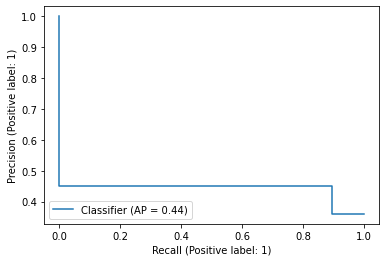

In [67]:
##Best Model with Outliers Removed (Edited Neighbours with Balanced Bagging)
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=9)
x_train_out, y_train_out = enn.fit_resample(train_X_outlier, train_y_outlier)
diabetes_status_outlier = BalancedBaggingClassifier(n_estimators=500, n_jobs=-1,random_state=2022)
diabetes_status_outlier.fit(x_train_out, y_train_out)


#Plot both Precision_Recall and ROC curves
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
from sklearn.metrics import RocCurveDisplay
y_pred = diabetes_status_outlier.predict(test_X_ins)

#Plot the precision and Roc
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

__End of Section 3__

## Section 4:  Unsupervised Learning

In this section, we examine unsupervised learning algorithm. Current unsupervised learning techniques do not differentiate between training and test data. Thus, we performed the unsupervised learning on the whole unbalanced data, since in practice, unsupervised learning has no labels. 

In [68]:
#data to use (data after dropping duplicates and variables with more than 60% missing observations)
data.head()

encounter_id  hospital_id gender  ethnicity   age  elective_surgery  \
0        214826          118      M  Caucasian  68.0                 0   
1        276985          118      F  Caucasian  25.0                 0   
2        262220          118      F  Caucasian  81.0                 1   
3        201746           33      M  Caucasian  19.0                 0   
4        246060           81      F  Caucasian  77.0                 0   

   height  weight        bmi  readmission_status      icu_type  h1_temp_max  \
0   180.3    73.9  22.732803                   0         CTICU         39.5   
1   172.7    95.3  31.952749                   0  Med-Surg ICU         36.7   
2   165.1    61.7  22.635548                   0         CTICU         35.6   
3   188.0     NaN        NaN                   0  Med-Surg ICU          NaN   
4   160.0    70.2  27.421875                   0  Med-Surg ICU         36.3   

   h1_temp_min  d1_bun_max  d1_bun_min  d1_glucose_min  d1_hco3_max  \
0         37.5        31.0        30.0           109.0         19.0   
1         36.7         NaN         NaN             NaN          NaN   
2         34.8         NaN         NaN            88.0          NaN   
3          NaN         NaN         NaN             NaN          NaN   
4         36.3        11.0         9.0           128.0         27.0   

   d1_hco3_min  d1_platelets_max  d1_platelets_min  d1_potassium_max  \
0         15.0             233.0             233.0               4.0   
1          NaN               NaN               NaN               NaN   
2          NaN             198.0              43.0               5.0   
3          NaN               NaN               NaN               NaN   
4         26.0             557.0             487.0               4.2   

   d1_potassium_min  d1_sodium_max  d1_sodium_min  d1_wbc_max  d1_wbc_min  \
0               3.4          136.0          134.0        14.1        14.1   
1               NaN            NaN            NaN         NaN         NaN   
2               3.5            NaN            NaN         9.0         8.0   
3               NaN            NaN            NaN         NaN         NaN   
4               3.8          145.0          145.0        23.3        12.7   

   wbc_apache  intubated_apache  d1_heartrate_max  heart_rate_apache  \
0        14.1                 0             119.0              118.0   
1         NaN                 0              96.0              102.0   
2         8.0                 1             116.0              114.0   
3         NaN                 0              89.0               60.0   
4        12.7                 0             118.0              120.0   

   gcs_motor_apache  gcs_eyes_apache  creatinine_apache  h1_spo2_max  \
0               6.0              3.0               2.51        100.0   
1               6.0              3.0                NaN         98.0   
2               6.0              4.0                NaN        100.0   
3               NaN              NaN                NaN        100.0   
4               3.0              1.0               0.56         95.0   

   map_apache  aids  cirrhosis  hepatic_failure  immunosuppression  leukemia  \
0        40.0     0          0                0                  0         0   
1        68.0     0          0                0                  0         0   
2        60.0     0          0                0                  0         0   
3       103.0     0          0                0                  0         0   
4        46.0     0          0                0                  0         0   

   lymphoma  solid_tumor_with_metastasis  ventilated_apache  diabetes_mellitus  
0         0                            0                  0                  1  
1         0                            0                  0                  0  
2         0                            0                  1                  0  
3         0                            0                  0                  0  
4       

In [69]:
#Indicate only the features used in the supervised learning (before supervised scaling)
unsupervised_data = data[['age', 'height', 'weight', 'h1_temp_min', 'd1_bun_max','d1_glucose_min', 
                                   'd1_hco3_max', 'd1_hco3_min', 'd1_potassium_max','d1_potassium_min', 'd1_sodium_max', 
                                   'd1_sodium_min', 'd1_wbc_max','d1_wbc_min', 'heart_rate_apache', 'gcs_eyes_apache',
                                   'creatinine_apache', 'map_apache', 'hepatic_failure', 'gender','ethnicity', 'icu_type',
                                   'diabetes_mellitus']]
unsupervised_data.columns

Index(['age', 'height', 'weight', 'h1_temp_min', 'd1_bun_max',
       'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'heart_rate_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'map_apache', 'hepatic_failure', 'gender',
       'ethnicity', 'icu_type', 'diabetes_mellitus'],
      dtype='object')

In [70]:
#Inspect missing data.
unsupervised_data.isnull().sum()

age                   2842
height                1181
weight                2072
h1_temp_min          17935
d1_bun_max            7908
d1_glucose_min        4357
d1_hco3_max          11899
d1_hco3_min          11899
d1_potassium_max      7185
d1_potassium_min      7185
d1_sodium_max         7613
d1_sodium_min         7613
d1_wbc_max           10477
d1_wbc_min           10477
heart_rate_apache      156
gcs_eyes_apache       1223
creatinine_apache    14582
map_apache             228
hepatic_failure          0
gender                  30
ethnicity              961
icu_type                 0
diabetes_mellitus        0
dtype: int64

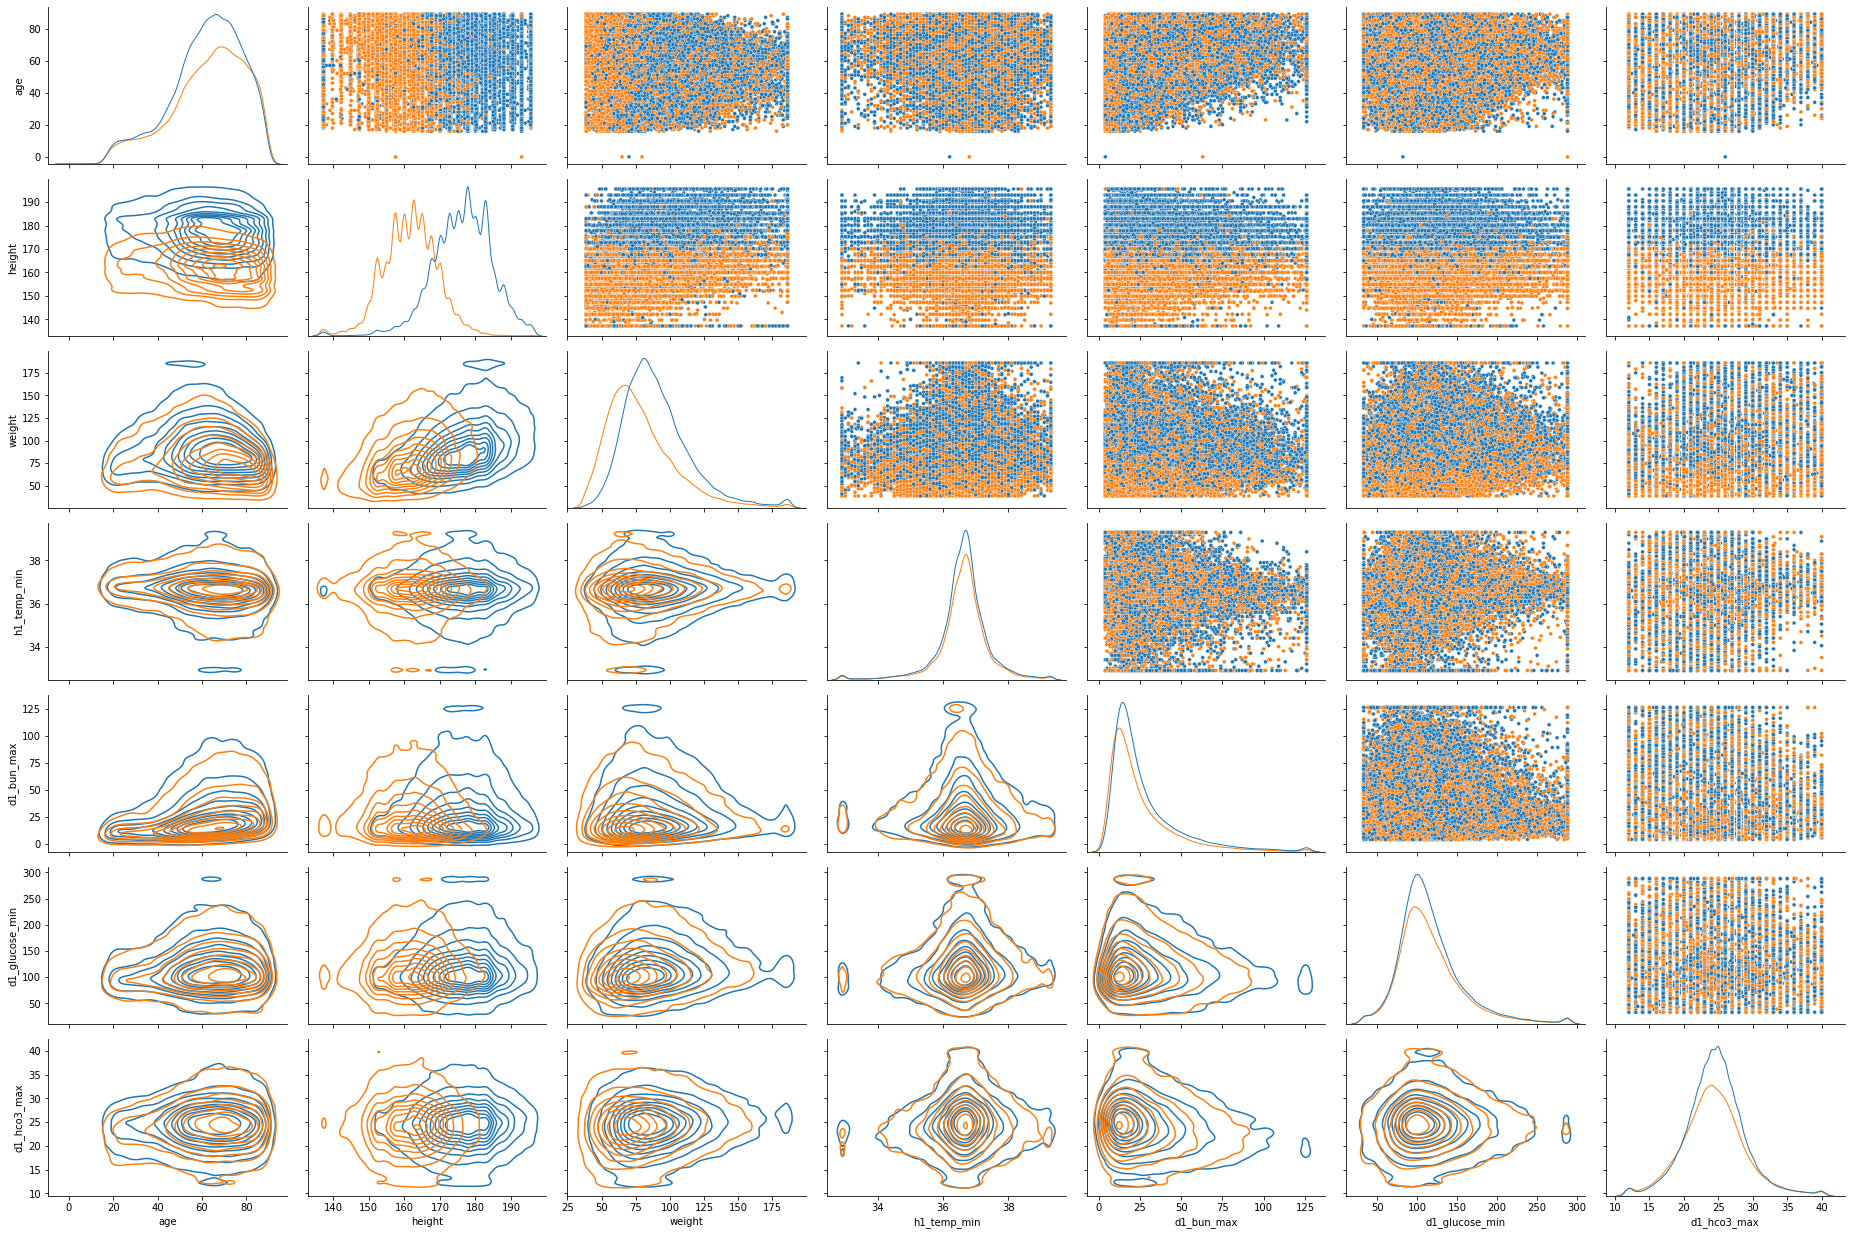

In [71]:
#Visualize some of the columns
subset = unsupervised_data[['age', 'height', 'weight', 'h1_temp_min', 'd1_bun_max','d1_glucose_min', 'd1_hco3_max',
                           'gender']]

grid = sns.PairGrid(subset, hue = 'gender', diag_sharey=False, aspect=1.5)
grid.map_upper(sns.scatterplot, s=15)
grid.map_lower(sns.kdeplot)
grid.map_diag(sns.kdeplot, lw=1)
plt.show()

The approach and general structure of the code below was adapted from Amr(2020). Amr, T. (2020). _Machine Learning with scikit-learn and Scientific Python Toolkits_.Packt Publishing Ltd: Birmingham, UK.

In [72]:
#Standardize the continuous feature (using Robust Scaling) and fill in missing values
unsupervised_data_features = unsupervised_data.loc[:,unsupervised_data.columns != 'diabetes_mellitus']

features_unsupervised = { 'string' : list(unsupervised_data_features.select_dtypes(include=['object']).columns), 
                        'numerical' : list(unsupervised_data_features.select_dtypes(exclude=['object']).columns), }

features_unsupervised['all'] = features_unsupervised['string'] + features_unsupervised['numerical']

print(features_unsupervised)

{'string': ['gender', 'ethnicity', 'icu_type'], 'numerical': ['age', 'height', 'weight', 'h1_temp_min', 'd1_bun_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'heart_rate_apache', 'gcs_eyes_apache', 'creatinine_apache', 'map_apache', 'hepatic_failure'], 'all': ['gender', 'ethnicity', 'icu_type', 'age', 'height', 'weight', 'h1_temp_min', 'd1_bun_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'heart_rate_apache', 'gcs_eyes_apache', 'creatinine_apache', 'map_apache', 'hepatic_failure']}


In [73]:
#Fill in missing observations and use robust scaling for whole dataset. 
#Import the packages
from sklearn.impute import SimpleImputer
from category_encoders.one_hot import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

numerical_mputer = ColumnNamesKeeper(SimpleImputer(missing_values=np.nan, strategy='median'))
string_mputer = ColumnNamesKeeper(SimpleImputer(missing_values=np.nan, strategy='most_frequent'))

# Scaling Function
robust_scaler = ColumnNamesKeeper(RobustScaler())

#One-Hot encoding 
onehot_encoder = OneHotEncoder(cols=features_unsupervised['string'], handle_unknown='value', use_cat_names=True)

numerical_pipeline = Pipeline([('numerical_mputer', numerical_mputer), ('robust_scaler', robust_scaler)])
string_pipeline = Pipeline([('string_mputer', string_mputer), ('onehot_encoder', onehot_encoder)])

#Concatenate the varaibles 
unsupervised_scaled = pd.concat([numerical_pipeline.fit_transform(unsupervised_data_features[features_unsupervised['numerical']]),
                         string_pipeline.fit_transform(unsupervised_data_features[features_unsupervised['string']]),],axis = 1)

In [75]:
#Use only features(columns) used in supervised learning
X_uns = unsupervised_scaled[['age', 'height', 'weight', 'h1_temp_min', 'd1_bun_max',
       'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'heart_rate_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'map_apache', 'hepatic_failure', 'gender_F',
       'ethnicity_Caucasian', 'ethnicity_African American',
       'icu_type_Med-Surg ICU', 'icu_type_CCU-CTICU', 'icu_type_Neuro ICU',
       'icu_type_Cardiac ICU']]

#Ascertain remaining columns
X_uns.columns

Index(['age', 'height', 'weight', 'h1_temp_min', 'd1_bun_max',
       'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'heart_rate_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'map_apache', 'hepatic_failure', 'gender_F',
       'ethnicity_Caucasian', 'ethnicity_African American',
       'icu_type_Med-Surg ICU', 'icu_type_CCU-CTICU', 'icu_type_Neuro ICU',
       'icu_type_Cardiac ICU'],
      dtype='object')

This approach and general structure of the code was adapted from Amr(2020). Amr, T. (2020). _Machine Learning with scikit-learn and Scientific Python Toolkits_.Packt Publishing Ltd: Birmingham, UK.

In [76]:
#Examine the required number of clusters using silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters_options = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = []
for i, n_clusters in enumerate(n_clusters_options):
    kmeans = KMeans(n_clusters=n_clusters, random_state=2022)
    y_pred = kmeans.fit_predict(X_uns)
    silhouette_scores.append(silhouette_score(X_uns, y_pred))

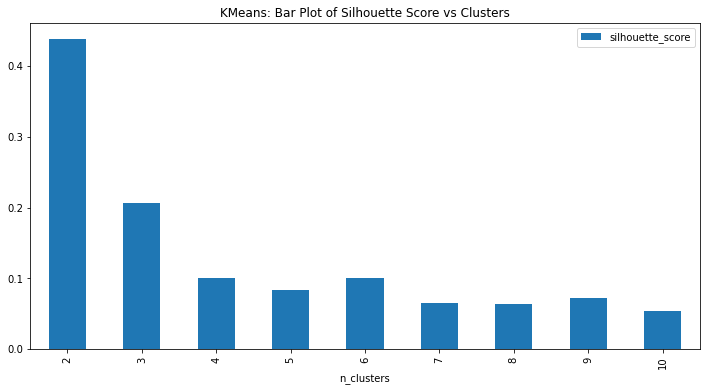

In [77]:
#Plot the scores against the index
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharey=False)
pd.DataFrame({'n_clusters': n_clusters_options,'silhouette_score': silhouette_scores,}
            ).set_index('n_clusters').plot(title='KMeans: Bar Plot of Silhouette Score vs Clusters',kind='bar',ax=ax)
plt.show()

In [78]:
#Estimate k-means model
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 2, random_state = 2022, init = 'k-means++')
k_means.fit(X_uns)

unsupervised_data['clusterkmeans'] = k_means.labels_
unsupervised_data['clusterkmeans'].value_counts()

1    72802
0     6354
Name: clusterkmeans, dtype: int64

In [79]:
#Original labels
unsupervised_data.diabetes_mellitus.value_counts()

0    51005
1    28151
Name: diabetes_mellitus, dtype: int64

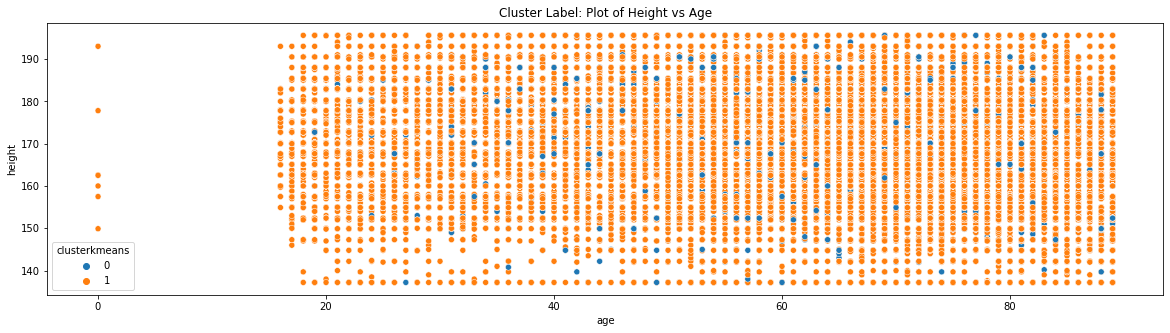

In [80]:
#The silhouette score indicated that two clusters were the best
#Plot the cluster on Age and Height on the k-means constrained 
plt.figure(figsize=(20,5))
sns.scatterplot(data=unsupervised_data, x="age", y="height", hue="clusterkmeans")
plt.title('Cluster Label: Plot of Height vs Age')
plt.show()

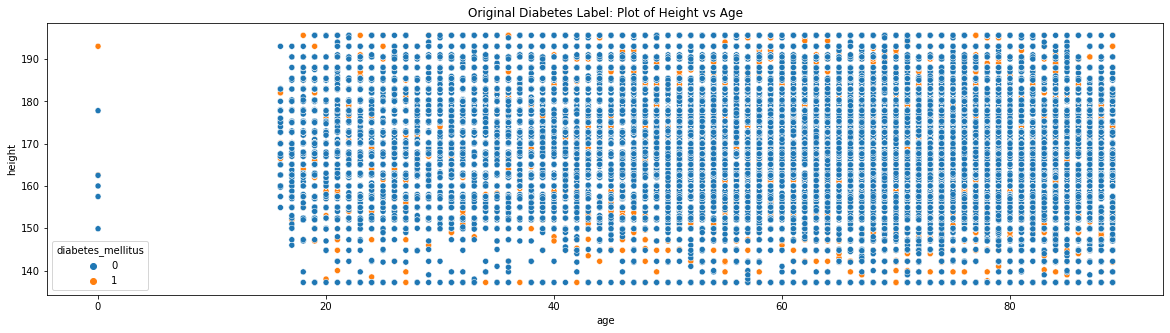

In [81]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=unsupervised_data, x="age", y="height", hue="diabetes_mellitus")
plt.title('Original Diabetes Label: Plot of Height vs Age')
plt.show()

In [82]:
#Score
from sklearn.metrics.cluster import adjusted_rand_score

score_uns = adjusted_rand_score(unsupervised_data.diabetes_mellitus, unsupervised_data.clusterkmeans)
score_uns

0.032074145810688216

In [83]:
#Score
from sklearn.metrics.cluster import adjusted_mutual_info_score

score_unsm = adjusted_mutual_info_score(unsupervised_data.diabetes_mellitus, unsupervised_data.clusterkmeans)
score_unsm

0.011834892421842129